In [1]:
# SIR Model Complex Network (Generating connections)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.animation 
import numpy as np
import networkx as nx
import copy
from itertools import product
from statistics import mean
import warnings #This is just to suppress any error warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
from datetime import datetime

In [2]:
#For diff recovery times later
def gamma_distribution(mean_days):
    scale = 1 # set to 1 by default. Can change later
    result = int(np.round(np.random.gamma(mean_days)))
    if result == 0: #means if no.of days to recovery is less than 1, we set it to be at least 1
        result = 1
    return result

### <u> Modelling Epidemic Spreading (Stochastic Model) </u>
In this chapter, we explore epidemic spreading using a stochastic approach. This method entails an agent based modelling technique to represent the spread of an epidemic, with each run being a monte-carlo simulation giving a different outcome.

#### <u> 1. Complex Social Networks </u>
Complex social networks are better reflections of interactions between individuals in a community. In the networks, nodes (vertex) are individuals either in the Susceptible, Infected or Recovered ($S$, $I$, $R$) compartment and edges are pairwise connections between individuals. We shall explore 3 networks in particular; Erdo-Renyi (random), Watts Strogatz (small-world) and Barabasi Albert (scale-free network), each with $N$ individuals. <br> 

*Cite: Social Network Visualization in Epidemiology - Nicholas A. Christakis, M.D., Ph.D., M.P.H. and James H. Fowler, Ph.D, A Literature Review of Social Network Analysis in Epidemic Prevention and Control - Xiaomei Wang,1Qi An,1Zilong He,1and Wei Fang
1*

1. <u> Erdo-Renyi (ER) Network </u>: The Erdo-Renyi model is a way to generate random networks. The construction begins with N nodes and each node will be connected with probability, $p$. In our construction, we ensure that all nodes are connected to at least one other node. <br><br>

2. <u> Watts Strogatz (WS) Network </u>: The Watts Strogatz model generates networks with small-world properties, that is most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other. In general, the network will have short average path lengths and high clustering. In our construction, each node will start with $k$ number of edges. The algorithm then rewires each edge with probability, $p$. The construction terminates when all edges have been checked and all nodes are connected to at least one other node. <br><br>

3. <u> Barabasi Albert (BA) Network </u>: The Barabasi Albert model generates networks with scale-free properties, that is the network's degree distribution follows a power law, through a preferential attachment mechanism. In our construction, we start with one node and attach $m$ new nodes to it each time. The more connected a node is, the more likely the $m$ nodes will attach itself to it. In other words, nodes with a higher degree have a stronger ability to grab new edges. The construction terminates when all nodes are connected to at least one other node.

*Cite all network properties and construction*

After constructing each network, we find their average degree $<k>$. This will be used to standardize transmission parameters for comparisons later on.

In [34]:
seed = 2367181
np.random.seed(seed)
N = 500

# (1) Random network
ER_network = nx.erdos_renyi_graph(N, p = 10/499, seed = seed) #(1) p = probability of connecting 2 nodes
if nx.is_connected(ER_network) == True:
    print("The ER network is connected!")

ER_average_deg = (len(ER_network.edges) * 2)/N #Average degree of ER network
print(ER_average_deg * nx.average_shortest_path_length(ER_network))
print(nx.average_shortest_path_length(ER_network))
print(nx.average_clustering(ER_network))
# ER_title = "Erdo-Renyi with Average Degree: " + str(ER_average_deg)
# plt.figure(figsize = (18,15))
# position_ER = nx.spring_layout(ER_network, scale = 8)
# plt.figure(1)
# plt.title(ER_title)
# nx.draw(ER_network, position_ER, with_labels = True, font_size = 8, font_weight = 'bold', node_color = '#66ff33')

# (2) Small world network: k = no. of neighbours != odd , p = probability of rewiring 
WS_network = nx.connected_watts_strogatz_graph(N, k = 10, p = 0.5, seed = seed) 
if nx.is_connected(WS_network) == True:
    print("The WS network is connected!")
    
WS_average_deg = (len(WS_network.edges) * 2)/N #Average degree of WS network
print(WS_average_deg * nx.average_shortest_path_length(WS_network))
print(nx.average_shortest_path_length(WS_network))
print(nx.average_clustering(WS_network))
# WS_title = "Watts Strogatz with Average Degree: " + str(WS_average_deg)
# plt.figure(figsize = (18,15))
# position_WS = nx.spring_layout(WS_network, scale = 8)
# plt.figure(2)
# plt.title(WS_title)
# nx.draw(WS_network, position_WS, with_labels = True, font_size = 8, font_weight = 'bold', node_color = '#66ff33')

# (3) Scale free network: m = no.of edges to attach from new to existing node
BA_network = nx.barabasi_albert_graph(N, m = 5, seed = seed) 
if nx.is_connected(BA_network) == True:
    print("The BA network is connected!")

BA_average_deg = (len(BA_network.edges) * 2)/N #Average degree of BA network
print(BA_average_deg * nx.average_shortest_path_length(BA_network))
print(nx.average_shortest_path_length(BA_network))
print(nx.average_clustering(BA_network))
# BA_title = "Barabasi Albert with Average Degree: " + str(BA_average_deg)
# plt.figure(figsize = (18,15))
# position_BA = nx.spring_layout(BA_network, scale = 8)
# plt.figure(3)
# plt.title(BA_title)
# nx.draw(BA_network, position_BA, with_labels = True, font_size = 8, font_weight = 'bold', node_color = '#66ff33')

plt.show()
# Each network has an approximate average degree of 10 

The ER network is connected!
29.329138981963926
2.945875751503006
0.02312143640673052
The WS network is connected!
30.423887775551105
3.0423887775551104
0.09398171828171836
The BA network is connected!
27.488193186372747
2.7765851703406814
0.05851198845405104


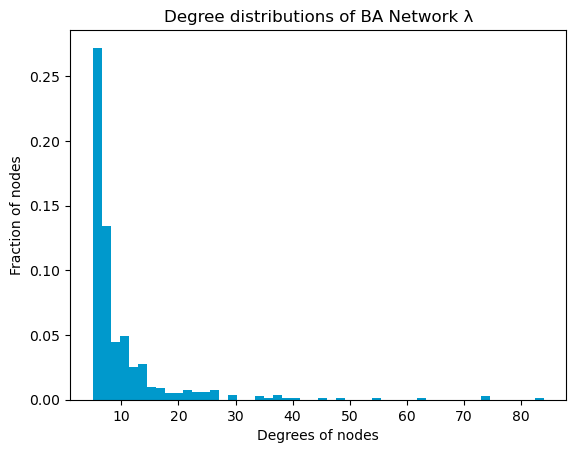

In [59]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins = 50, density = True, color = '#0099cc')
    plt.title("Degree distributions of BA Network \u03BB")
    plt.xlabel("Degrees of nodes")
    plt.ylabel("Fraction of nodes")
    plt.show()

plot_degree_dist(BA_network)
# plot_degree_dist(WS_network)
# plot_degree_dist(BA_network)


In [86]:
print("\u03BB", "\u0394")
print(r"\{SUBSCRIPT TWO}")
print(u"$H_{2}$")

λ Δ
\{SUBSCRIPT TWO}
$H_{2}$


#### <u> 2. Reproduction Numbers </u> [Recheck & elaborate on definition]

The ODE method in the previous chapter characterises the initial spread of an epidemic using the basic reproduction number, $r_0$. However, $r_0$ is a constant and does not accurately reflect the changes in the epidemic over time. In the complex social network model, we shall improve on this and introduce specific definitions of reproduction number, pertaining to this approach, to capture the true dynamcs of an epidemic. These reproduction numbers are; local, underestimate, overestimate and true reproduction number:

1. <u>Local Reproduction Number ($r_l$)</u>: $r_l$ is an input parameter used to describe the initial spread of an epidemic in a network. It is defined to be the product of the probability of transmission of a virus, $p_T$, and the average degree $<k>$ of the network. The purpose of $r_l$ is to standardize the transmissibility of the virus at the initial stage for different networks. This is as different networks have different average degrees 

2. <u>Underestimate Reproduction Number ($r_U$) </u>: $r_U$ is used to describe the average number of new infections in the population at time, $t_{i+1}$, due to the number of infected individuals in $t_{i}$. It can be found by dividing the new changes in infected individuals at $t_{i+1}$ with the number of infected individuals at $t_{i}$. The purpose of $r_U$ is to characterize the transmissibility of the virus given that we have no information of the type of network and connection between individuals in different compartment. <br><br>

3. <u>Overestimate Reproduction Number ($r_O$)</u>: $r_O$ arises when we have knowledge of the type of network. It represents the "worst case scenario" in an epidemic by assuming that a newly infected individual gets the virus from all his neighbours. In our construction, $r_O$ is found with the following steps:<br>
(a) For every new infection, $j$, at time $t_{i+1}$, we take the sum of the infected individuals surrounding $j$ at $t_{i}$. The sum is denoted by $Q_j$. <br>
(b) $r_O$ is found by taking $\sum Q_{j}$ divided by the number of infected individuals at time $t_{i}$. <br><br>

4. <u>True Reproduction Number ($r_t$)</u>: $r_t$ proceeds when we have knowledge of the type of network as well as perfect knowledge of the pairwise interactions between susceptible and infected individuals. In other words, we know who actually transmits the virus to the newly infected indvidual at time $t_{i+1}$. The purpose of $r_t$ is to figure the average actual number of transmissions and give the most accurate description of the real time reproduction number. It is found by taking the actual number of transmission at $t_{i+1}$ divided by the number of infected individual at $t_{i}$.

#### <u> 3. Agent-based simulation (Method) </u>

With the foundations laid, we now construct the agent-based simulation that will be used to find the reproduction numbers in our stochastic approach. <br>

#### <u> 3a. Input parameters </u>

The simulation has four inputs:
1. Local Reproduction Number ($r_l$): Using $r_l$, we find the probability of virus transmission between each node, $p_t$, to be:

\begin{align}
    p_T = \frac {r_l}{<k>} \
\end{align} <br>
    
2. Days to recover ($D_{recover}$): Number of days it takes an infected individual to recover, alternatively, number of days an infected individual stays infected.
3. Initial number of infected individual ($I_0$): Set to 1 by default <br>
4. Network type: Erdo-Renyi, Watts Strogatz or Barabasi Albert

#### <u> 3b. Simulation </u> [Recheck & elaborate on methodology]

After the inputs have been set, the simulation begins as follows:
1. $I_0$ number of individuals are selected at random at $t_{0}$. 
    
2. The program finds the neighbours (connections) of those infected individuals and executes a coin toss with each neighbour. The probability of getting "0" and "1" are 1 - $p_T$ and $p_T$ respectively.
    
3. The neighbour will be infected if the result gives "1" and stays susceptible if it gives "0". The results are compiled and stored in a list.
    
4. The program then checks if the neighbours are in the "Infected" or "Recovered" category. If either of the above is true, the coin toss in step 3 will not take effect. Contrary, if the above is False, the result of the coin toss will set in and the neighbour will turn "Infected" or remain "Susceptible" depending.
    
5. The process in step 4 iterates sequentially from the stored list and a neighbour will not be "Infected" more than once.
    
6. After steps 2 - 5, the program checks if the infected individuals in step 2 have recovered from the day he was infected. If it is equal to $D_{recover}$, the infected individual in step 2 transits from the "Infected" to "Recovered" category. 
    
7. The program finally compiles the new number of infected individuals after executing steps 2 - 6, and updates step 1. 
    
8. The simulation repeats from steps 1 - 7 and ends when there are no more infected individuals in the population.<br><br>
    
#### <u> 3c. Reproduction Numbers </u>
- Underestimate Reproduction Number ($r_U$): $r_U$ for the interval between $t_{i}$ and $t_{i+1}$ can be found by summing the number of new infections in step 5 and dividing by the number of individuals in step 1. <br>
    
- Overestimate Reproduction Number ($r_O$): $r_O$ for the interval between $t_{i}$ and $t_{i+1}$ can be found by tabulating the number of infected neighbours surrounding those who were newly infected divided by the number of individuals in step 1. <br>

- True Reproduction Number ($r_t$): $r_t$ for the interval between $t_{i}$ and $t_{i+1}$ can be found by summing the number of actual transmissions as in step 4, divided by the number of individuals in step 1.

In [4]:
#Simulation for ONE RUN!
def simulation(I0, days_to_recover, beta, network, simulation_seeds, gamma_recovery): 
    #simulation_seeds is a list with only ONE element
    #gamma_recovery is either a 0 or 1. By default is 0. It is only 1 later on
    
    avr_degree = (len(network.edges) * 2) / (network.number_of_nodes())
    probability_infection = beta/avr_degree  

    # 7 important lists for all plots
    susceptible_progression_matrix = []
    infection_progression_matrix = []
    recovered_progression_matrix = []
    R_t_version1_matrix = []
    R_t_version2_matrix = []
    R_t_version3_matrix = []
    network_changes_matrix = []
    
    # Recovery distribution (0 means fixed recovery day, 1 means gamma distribution)
    gamma_distribution_activate = gamma_recovery

    for i in simulation_seeds:
        seed_network = i
        np.random.seed(i)
        index = np.sort(np.random.choice(N, I0, replace = False))

        #Versions of R_t
        R_t_version1 = [] #just raw changes in infected numbers
        R_t_version2 = [] #as long as someone is infected, will treat as he got from all neighbours even if its not true
        R_t_version3 = [] #god's view. We will know who are the exact transmitters

        #Simulation code
        infected_vector = np.zeros(N) #tracks infection
        recovery_vector = np.zeros(N) #tracks recovery

        infected_vector[index] = 1
        recovery_vector[index] = days_to_recover
        previous_infected_vector = np.copy(infected_vector) #To register the previous day's infected vector for comparison
        previous_recovery_vector = np.copy(recovery_vector) #To register the previous day's recovery vector for comparison

        network_changes = np.copy(infected_vector) #To get changes in the number of infectious individuals daily, master copy

        while len(index) != 0: #assuming recovery time is D day and that we only stop when no one gets infected 
            connection = list(network.edges(index)) 
        #     print(connection)
            actual_transmission = []

            for i in range(len(connection)):
                transmit_virus = np.random.choice(2, 1, p=[1 - probability_infection, probability_infection]) 
        #         print(transmit_virus)
                actual_transmission.append(transmit_virus[0])

                if transmit_virus == 1:
                    if infected_vector[connection[i][1]] >= 1 :
                        continue
                    else:                  
                        infected_vector[connection[i][1]] += 1
                        if gamma_distribution_activate == 0:
                            recovery_vector[connection[i][1]] += days_to_recover
                        elif gamma_distribution_activate == 1:
                            gamma_recovery_days = gamma_distribution(days_to_recover)
                            recovery_vector[connection[i][1]] += gamma_recovery_days

            for j in index: #this is to update the recovery_vector
                if previous_recovery_vector[j] == 1: 
                    recovery_vector[j] -= 1
                    infected_vector[j] = 3 #once its equals to 3, it means the person will not get infected anymore

                elif previous_recovery_vector[j] > 1:
                    recovery_vector[j] -= 1

            #Number of previously infected individuals:
            number_of_previous_infected = len((np.where(previous_infected_vector == 1))[0])
            
            #Finding R_t_version1
            index_of_new_infections = np.where((infected_vector - previous_infected_vector) == 1)[0]
            daily_new_infections = (len(index_of_new_infections))/number_of_previous_infected
            R_t_version1.append(daily_new_infections)

            #Finding R_t_version2
            overestimate_count = 0
            for k in connection:
                if k[1] in index_of_new_infections:
                    if previous_infected_vector[k[0]] == 1:
                        overestimate_count += 1
            R_t_version2.append(overestimate_count/number_of_previous_infected)

            #Finding R_t_version3
            actual_transmission_counter = 0
            for l in list(connection):
                if l[1] in index_of_new_infections:
                    if actual_transmission[(list(connection).index(l))] == 1:
                        actual_transmission_counter +=1
            R_t_version3.append(actual_transmission_counter/number_of_previous_infected)

            #For updating vectors
            previous_infected_vector = np.copy(infected_vector)
            previous_recovery_vector = np.copy(recovery_vector)
            network_changes = np.vstack([network_changes, infected_vector])
            index = np.where(infected_vector == 1)[0]
            
        susceptible_progression = np.count_nonzero(network_changes.astype(int) == 0, axis=1)
        susceptible_progression_matrix.append(list(susceptible_progression))
        infection_progression = np.count_nonzero(network_changes.astype(int) == 1, axis=1)
        infection_progression_matrix.append(list(infection_progression))
        recovered_progression = np.count_nonzero(network_changes.astype(int) == 3, axis=1)
        recovered_progression_matrix.append(list(recovered_progression))

        R_t_version1_matrix.append(R_t_version1)
        R_t_version2_matrix.append(R_t_version2)
        R_t_version3_matrix.append(R_t_version3)
        network_changes_matrix.append(network_changes)
        
    return susceptible_progression_matrix, infection_progression_matrix, recovered_progression_matrix, \
            R_t_version1_matrix, R_t_version2_matrix, R_t_version3_matrix, network_changes_matrix

#returns S, I, R, under, over, true reproduction numbers, and the changes in the network

In [5]:
### Code that generated by data:

seed = 43434
simulation_seeds = [seed]
I0 = 1
r_l = 4
D_recover = 3
g = 0
ER_simulation_result = simulation(I0, D_recover, r_l, ER_network, simulation_seeds, g)
WS_simulation_result = simulation(I0, D_recover, r_l, WS_network, simulation_seeds, g)
BA_simulation_result = simulation(I0, D_recover, r_l, BA_network, simulation_seeds, g)

#### <u> 3.1 Network Plots & Graphs  of Agent-based simulation (Method)</u>

In [6]:
# Network representation of transitions
def network_color_plot(network_changes):
    network_plot = np.copy(network_changes)
    network_plot = np.where(network_plot == 0, '#66ff33', network_plot) # S node
    network_plot = np.where(network_plot == '1.0', '#ff5050', network_plot) # I node #first line converted 1 & 2 to str
    network_plot = np.where(network_plot == '3.0', '#6699ff', network_plot) # R node

    return network_plot

#Choose what network to plot. Change <- when changing diff network
network_to_plot = network_color_plot(np.copy(ER_simulation_result[-1][0])) # <-

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

def animate(i):
    plt.clf()
    plt.title("Day %d"%(i+1))
    nx.draw(ER_network, pos = position_ER, with_labels = True, font_size = 10, \
            font_weight = 'bold', node_color = network_to_plot[i]) # <-

fig = plt.gcf()
matplotlib.animation.FuncAnimation(fig, animate, frames = len(network_to_plot), interval = 250)
# network_plot = np.reshape(network_plot, ((len(network_plot))//N, N))
# print(network_plot_ER)

NameError: name 'position_ER' is not defined

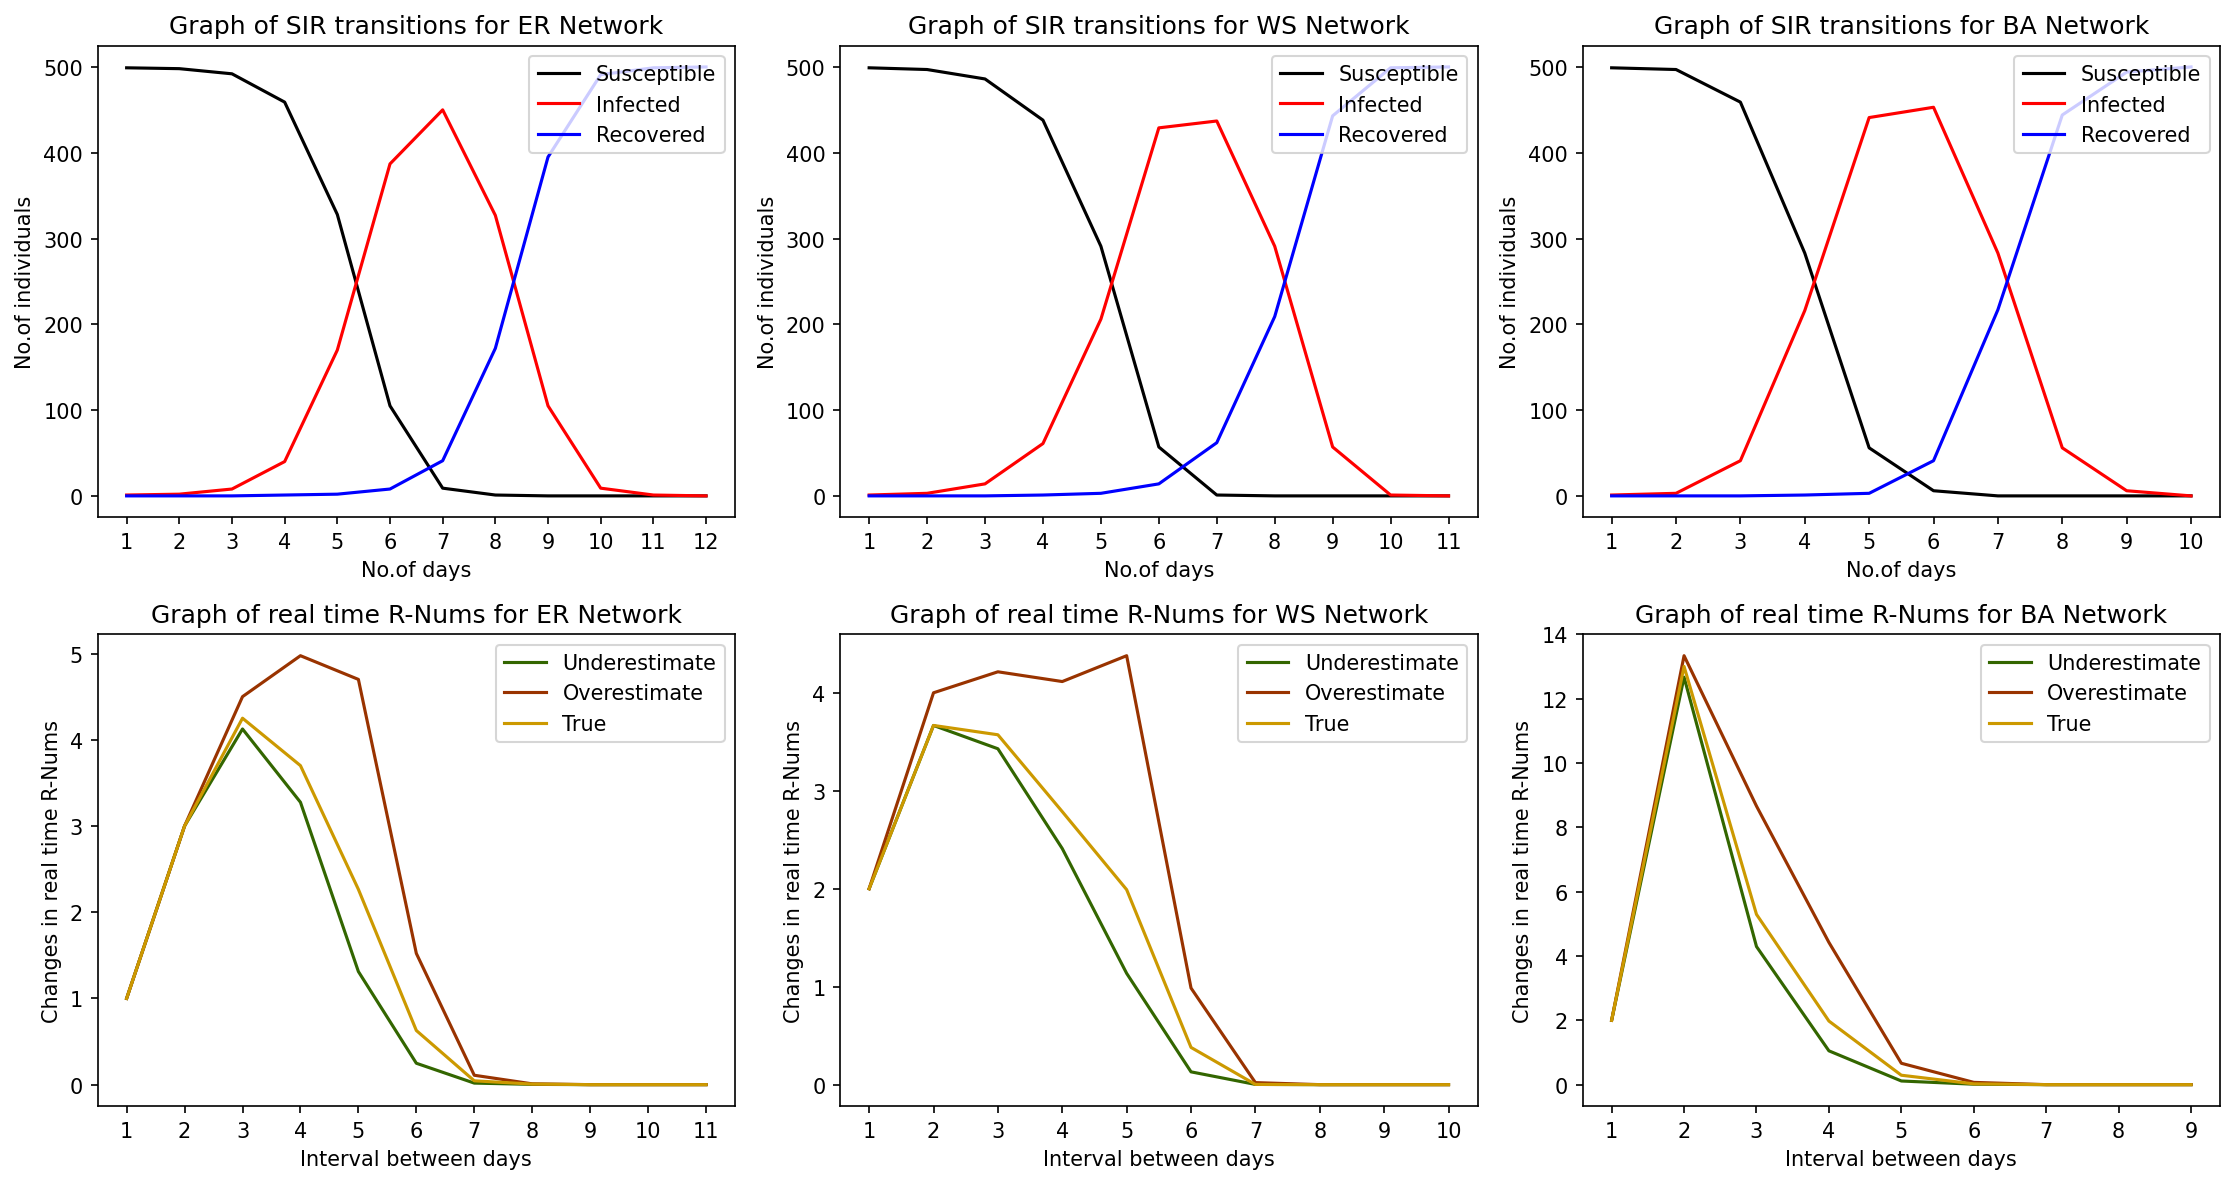

In [7]:
#Plot of S, I, R Simulation & Reproduction Numbers
plt.close()

ER_SIR_simulation_time = np.arange(1, len(ER_simulation_result[0][0])+1)
WS_SIR_simulation_time = np.arange(1, len(WS_simulation_result[0][0])+1)
BA_SIR_simulation_time = np.arange(1, len(BA_simulation_result[0][0])+1)

ER_Repro_simulation_time = np.arange(1, len(ER_simulation_result[0][0]))
WS_Repro_simulation_time = np.arange(1, len(WS_simulation_result[0][0]))
BA_Repro_simulation_time = np.arange(1, len(BA_simulation_result[0][0]))

fig, axs = plt.subplots(2,3, figsize = (15,8))

axs[0][0].plot(ER_SIR_simulation_time, ER_simulation_result[0][0], label  = "Susceptible", color = 'k')
axs[0][0].plot(ER_SIR_simulation_time, ER_simulation_result[1][0], label  = "Infected", color = 'r')
axs[0][0].plot(ER_SIR_simulation_time, ER_simulation_result[2][0], label  = "Recovered", color = 'b')
axs[0][0].set_xticks(np.arange(ER_SIR_simulation_time[0], ER_SIR_simulation_time[-1]+1))
axs[0][0].set_title("Graph of SIR transitions for ER Network")
axs[0][0].set_xlabel("No.of days")
axs[0][0].set_ylabel("No.of individuals")
axs[0][0].legend(loc = 1)

axs[0][1].plot(WS_SIR_simulation_time, WS_simulation_result[0][0], label  = "Susceptible", color = 'k')
axs[0][1].plot(WS_SIR_simulation_time, WS_simulation_result[1][0], label  = "Infected", color = 'r')
axs[0][1].plot(WS_SIR_simulation_time, WS_simulation_result[2][0], label  = "Recovered", color = 'b')
axs[0][1].set_xticks(np.arange(WS_SIR_simulation_time[0], WS_SIR_simulation_time[-1]+1))
axs[0][1].set_xlabel("No.of days")
axs[0][1].set_ylabel("No.of individuals")
axs[0][1].set_title("Graph of SIR transitions for WS Network")
axs[0][1].legend(loc = 1)

axs[0][2].plot(BA_SIR_simulation_time, BA_simulation_result[0][0], label  = "Susceptible", color = 'k')
axs[0][2].plot(BA_SIR_simulation_time, BA_simulation_result[1][0], label  = "Infected", color = 'r')
axs[0][2].plot(BA_SIR_simulation_time, BA_simulation_result[2][0], label  = "Recovered", color = 'b')
axs[0][2].set_xticks(np.arange(BA_SIR_simulation_time[0], BA_SIR_simulation_time[-1]+1))
axs[0][2].set_xlabel("No.of days")
axs[0][2].set_ylabel("No.of individuals")
axs[0][2].set_title("Graph of SIR transitions for BA Network")
axs[0][2].legend(loc = 1)

#R-Nums
axs[1][0].plot(ER_Repro_simulation_time, ER_simulation_result[3][0], label  = "Underestimate", color = '#336600')
axs[1][0].plot(ER_Repro_simulation_time, ER_simulation_result[4][0], label  = "Overestimate", color = '#993300')
axs[1][0].plot(ER_Repro_simulation_time, ER_simulation_result[5][0], label  = "True", color = '#cc9900')
axs[1][0].set_xticks(np.arange(ER_Repro_simulation_time[0], ER_Repro_simulation_time[-1]+1))
axs[1][0].set_xlabel("Interval between days")
axs[1][0].set_ylabel("Changes in real time R-Nums")
axs[1][0].set_title("Graph of real time R-Nums for ER Network")
axs[1][0].legend(loc = 1)

axs[1][1].plot(WS_Repro_simulation_time, WS_simulation_result[3][0], label  = "Underestimate", color = '#336600')
axs[1][1].plot(WS_Repro_simulation_time, WS_simulation_result[4][0], label  = "Overestimate", color = '#993300')
axs[1][1].plot(WS_Repro_simulation_time, WS_simulation_result[5][0], label  = "True", color = '#cc9900')
axs[1][1].set_xticks(np.arange(WS_Repro_simulation_time[0], WS_Repro_simulation_time[-1]+1))
axs[1][1].set_xlabel("Interval between days")
axs[1][1].set_ylabel("Changes in real time R-Nums")
axs[1][1].set_title("Graph of real time R-Nums for WS Network")
axs[1][1].legend(loc = 1)

axs[1][2].plot(BA_Repro_simulation_time, BA_simulation_result[3][0], label  = "Underestimate", color = '#336600')
axs[1][2].plot(BA_Repro_simulation_time, BA_simulation_result[4][0], label  = "Overestimate", color = '#993300')
axs[1][2].plot(BA_Repro_simulation_time, BA_simulation_result[5][0], label  = "True", color = '#cc9900')
axs[1][2].set_xticks(np.arange(BA_Repro_simulation_time[0], BA_Repro_simulation_time[-1]+1))
axs[1][2].set_xlabel("Interval between days")
axs[1][2].set_ylabel("Changes in real time R-Nums")
axs[1][2].set_title("Graph of real time R-Nums for BA Network")
axs[1][2].legend(loc = 1)

fig.tight_layout()
plt.show()

Above are the results for one simulation with input parameters: $r_l$ = 4, $D_{recover}$ = 3 and $I_0$ = 1.<br>

The SIR transitions shown above are within our expectation with similar trends across different networks. The epidemic ends approximately the same time ($t_{end}$:10 ~ 12) and the maximum infection numbers peaked to around $I$ > 400 at some time between $t_6$ ~ $t_7$. <br>

On the other hand, the results from the plots of the reproduction number give interesting insights:

1. $r_T$ is bounded between $r_U \leq r_T \leq r_O$ for all networks. This is within our expectations due to the manner we construct and define the reproduction numbers earlier. <br><br>

2. All reproduction numbers across different networks show the same general trend, peaking before slowly decreasing. However, we notice that the rate of increase is quite different for the BA network at $t_2$, as seen where it peaks sharply with a value close to 14 before dropping to a value around 5 at $t_3$. On the contrary, the increment for ER and WS network are rather gentler. This may be due to the nature of the BA network which has some nodes with high degree of distribution (hubs). In this scenario, it could have been that patient zero has infected a susceptible neighbour who is a hub at $t_1$, causing that infected individual to spread to more susceptible individuals at $t_2$. This can be verified by inspecting the connections of the newly infected individuals at $t_2$, and indeed we find that one of the nodes has a local degree distrbution of 84. <br><br>

3. The initial spread of the epidemic at $t_1$ is different across networks though they all have the same $r_l$ = 3. This can be explained by understanding that although the average degree for all networks is approximately the same (~10), the local degree of each node across all networks may be different. Therefore, the initial spread of the epidemic is purely by chance since we select patient zero $I_0$ randomly.

#### <u> 4. Agent-based simulation [Canonical Average] </u>
In the previous segment, we saw changes to the $SIR$ transitions, and $r_U$, $r_O$ & $r_T$ over time for one simulation. To give a more accurate description of the epidemic across different networks, we should do a sufficiently large number of monte-carlo simulations and take the canonical average. However, there should also be a gauge to determine if the number of simulations is sufficient. <br> 

In our approach, we use the closeness to $r_l$ at $t_1$ as a benchmark. The reason for so is that $r_l$ represents the initial spread of an epidemic and each network should on average give the value $r_l$ for $r_U$, $r_O$ and $r_T$ at $t_1$. The "closeness" we define shall be $\pm$ 5% from the actual $r_l$ we input. <br>

Once results of the runs are completed, we standardize each run to have the same time frame by finding the maximum time $t_{max}$:

\begin{align}
    t_{max} = max[{t_1, t_2, ....,t_N}]\
\end{align} <br>

For runs $j$ that end before $t_{max}$, we extrapolate their last $S$, $I$, $R$, $r_U$, $r_O$ & $r_T$ data point by $t_{max}$ - $t_j$. With this, we are able to find the canonical mean and standard deviation of each network. The results are shown for 5000 simulations, with $r_l$ = 4, $D_{recover}$ = 3 and $I_0$ = 1.

In [8]:
#Standard Deviation Finder
def standard_deviation(data_set, mean):
    #Check if they are in np array since this works with numpy
    if type(data_set) != np.ndarray:
        data_set = np.array(data_set)
        
    if type(mean) != np.ndarray:
        mean = np.array(mean)
    
    variance = np.sum((data_set - mean.transpose())**2, axis = 0)/len(data_set)
    sd = (variance**0.5)
    return sd

In [9]:
def simulation_average(N_runs, number_of_simulations):
    extrapolated_susceptible = N_runs[0].copy()
    extrapolated_infection = N_runs[1].copy()
    extrapolated_recovered = N_runs[2].copy()
    
    extrapolated_R_t_version1 = N_runs[3].copy()
    extrapolated_R_t_version2 = N_runs[4].copy()
    extrapolated_R_t_version3 = N_runs[5].copy()
    
    max_time = len(max((extrapolated_infection), key = len)) #the max length is the same for susceptible & recovered
    
    for i in range(number_of_simulations):
        if len(extrapolated_susceptible[i]) < max_time:
            add_last_susceptible = [extrapolated_susceptible[i][-1]]*(max_time - len(extrapolated_susceptible[i]))
            extrapolated_susceptible[i] = extrapolated_susceptible[i] + add_last_susceptible

            add_last_infected = [extrapolated_infection[i][-1]]*(max_time - len(extrapolated_infection[i]))
            extrapolated_infection[i] = extrapolated_infection[i] + add_last_infected

            add_last_recovered = [extrapolated_recovered[i][-1]]*(max_time - len(extrapolated_recovered[i]))
            extrapolated_recovered[i] = extrapolated_recovered[i] + add_last_recovered
            
    max_time_R_t = len(max((extrapolated_R_t_version1), key = len)) #the max length is the same for all types of R_t
    
    for i in range(number_of_simulations):
        if len(extrapolated_R_t_version1[i]) < max_time_R_t:
            add_last_R_t_version1 = [extrapolated_R_t_version1[i][-1]]*(max_time_R_t - len(extrapolated_R_t_version1[i]))
            extrapolated_R_t_version1[i] = extrapolated_R_t_version1[i] + add_last_R_t_version1

            add_last_R_t_version2 = [extrapolated_R_t_version2[i][-1]]*(max_time_R_t - len(extrapolated_R_t_version2[i]))
            extrapolated_R_t_version2[i] = extrapolated_R_t_version2[i] + add_last_R_t_version2

            add_last_R_t_version3 = [extrapolated_R_t_version3[i][-1]]*(max_time_R_t - len(extrapolated_R_t_version3[i]))
            extrapolated_R_t_version3[i] = extrapolated_R_t_version3[i] + add_last_R_t_version3
                   
                
    #Finding the mean of the SIR data
    average_susceptible = np.array(extrapolated_susceptible).mean(axis = 0)
    average_infected = np.array(extrapolated_infection).mean(axis = 0)
    average_recovered = np.array(extrapolated_recovered).mean(axis = 0)
    max_time_scale = np.arange(1, max_time+1, step = 1)
    
    #Finding the Standard Deviation of the SIR data
    susceptible_SD = standard_deviation(extrapolated_susceptible, average_susceptible)
    infected_SD = standard_deviation(extrapolated_infection, average_infected)
    recovered_SD = standard_deviation(extrapolated_recovered, average_recovered)
    
    #Finding the mean of the Reproduction Numbers 
    average_R_t_version1 = np.array(extrapolated_R_t_version1).mean(axis = 0)
    average_R_t_version2 = np.array(extrapolated_R_t_version2).mean(axis = 0)
    average_R_t_version3 = np.array(extrapolated_R_t_version3).mean(axis = 0)
    max_time_scale_R_t = np.arange(1, max_time_R_t+1, step = 1)
    
    #Finding the Standard Deviation of the Reproduction Numbers data    
    R_t_V1_SD = standard_deviation(extrapolated_R_t_version1, average_R_t_version1)
    R_t_V2_SD = standard_deviation(extrapolated_R_t_version2, average_R_t_version2)
    R_t_V3_SD = standard_deviation(extrapolated_R_t_version3, average_R_t_version3)
           
    return [max_time_scale, average_susceptible, average_infected, average_recovered, susceptible_SD, infected_SD,\
           recovered_SD], [max_time_scale_R_t, average_R_t_version1, average_R_t_version2, average_R_t_version3, \
                           R_t_V1_SD, R_t_V2_SD, R_t_V3_SD], average_R_t_version1[0]

#simulation_average[0] - a list containing all data related to SIR 
#simulation_average[0][0] - SIR time scale
#simulation_average[0][1], [0][2], [0][3] - S, I & R mean 
#simulation_average[0][4], [0][5], [0][6] - S, I & R SD

#simulation_average[1] - a list containing all data related to Reproduction Numbers
#simulation_average[1][0] - Reproduction Number time scale
#simulation_average[1][1], [1][2], [1][3] - r_U, r_O, r_t mean 
#simulation_average[1][4], [1][5], [1][6] - r_U, r_O, r_t SD

#simulation_average[2] - the ensemble $r_l$

In [16]:
#Executing the simulations for N-Runs
np.random.seed(43434)
number_of_simulations = 5
N_simulation_seeds = np.random.choice(100000, number_of_simulations, replace = False)

I0 = 1
r_l = 4
D_recover = 3

In [14]:
start_time_test = datetime.now()

#Results from N number of simulations
ER_N_runs_simulation_result = simulation(I0, D_recover, r_l, ER_network, N_simulation_seeds,0)[0:-1]
WS_N_runs_simulation_result = simulation(I0, D_recover, r_l, WS_network, N_simulation_seeds,0)[0:-1]
BA_N_runs_simulation_result = simulation(I0, D_recover, r_l, BA_network, N_simulation_seeds,0)[0:-1]

#Average results and their SD
ER_average_simulation_result = simulation_average(ER_N_runs_simulation_result, number_of_simulations)
WS_average_simulation_result = simulation_average(WS_N_runs_simulation_result, number_of_simulations)
BA_average_simulation_result = simulation_average(BA_N_runs_simulation_result, number_of_simulations)

end_time_test = datetime.now()

print('Duration: {}'.format(end_time_test - start_time_test))

#Closeness of ensemble r_l with input r_l
ER_ensemble_local = 1 - ((abs(r_l - ER_average_simulation_result[-1])) / r_l)
WS_ensemble_local = 1 - ((abs(r_l - WS_average_simulation_result[-1])) / r_l)
BA_ensemble_local = 1 - ((abs(r_l - BA_average_simulation_result[-1])) / r_l)

print("Closeness of ER ensemble r_l is:", ER_ensemble_local)
print("Closeness of WS ensemble r_l is:", WS_ensemble_local)
print("Closeness of BA ensemble r_l is:", BA_ensemble_local)

Duration: 0:00:06.288375
Closeness of ER ensemble r_l is: 0.9333333333333332
Closeness of WS ensemble r_l is: 0.8666666666666667
Closeness of BA ensemble r_l is: 0.0


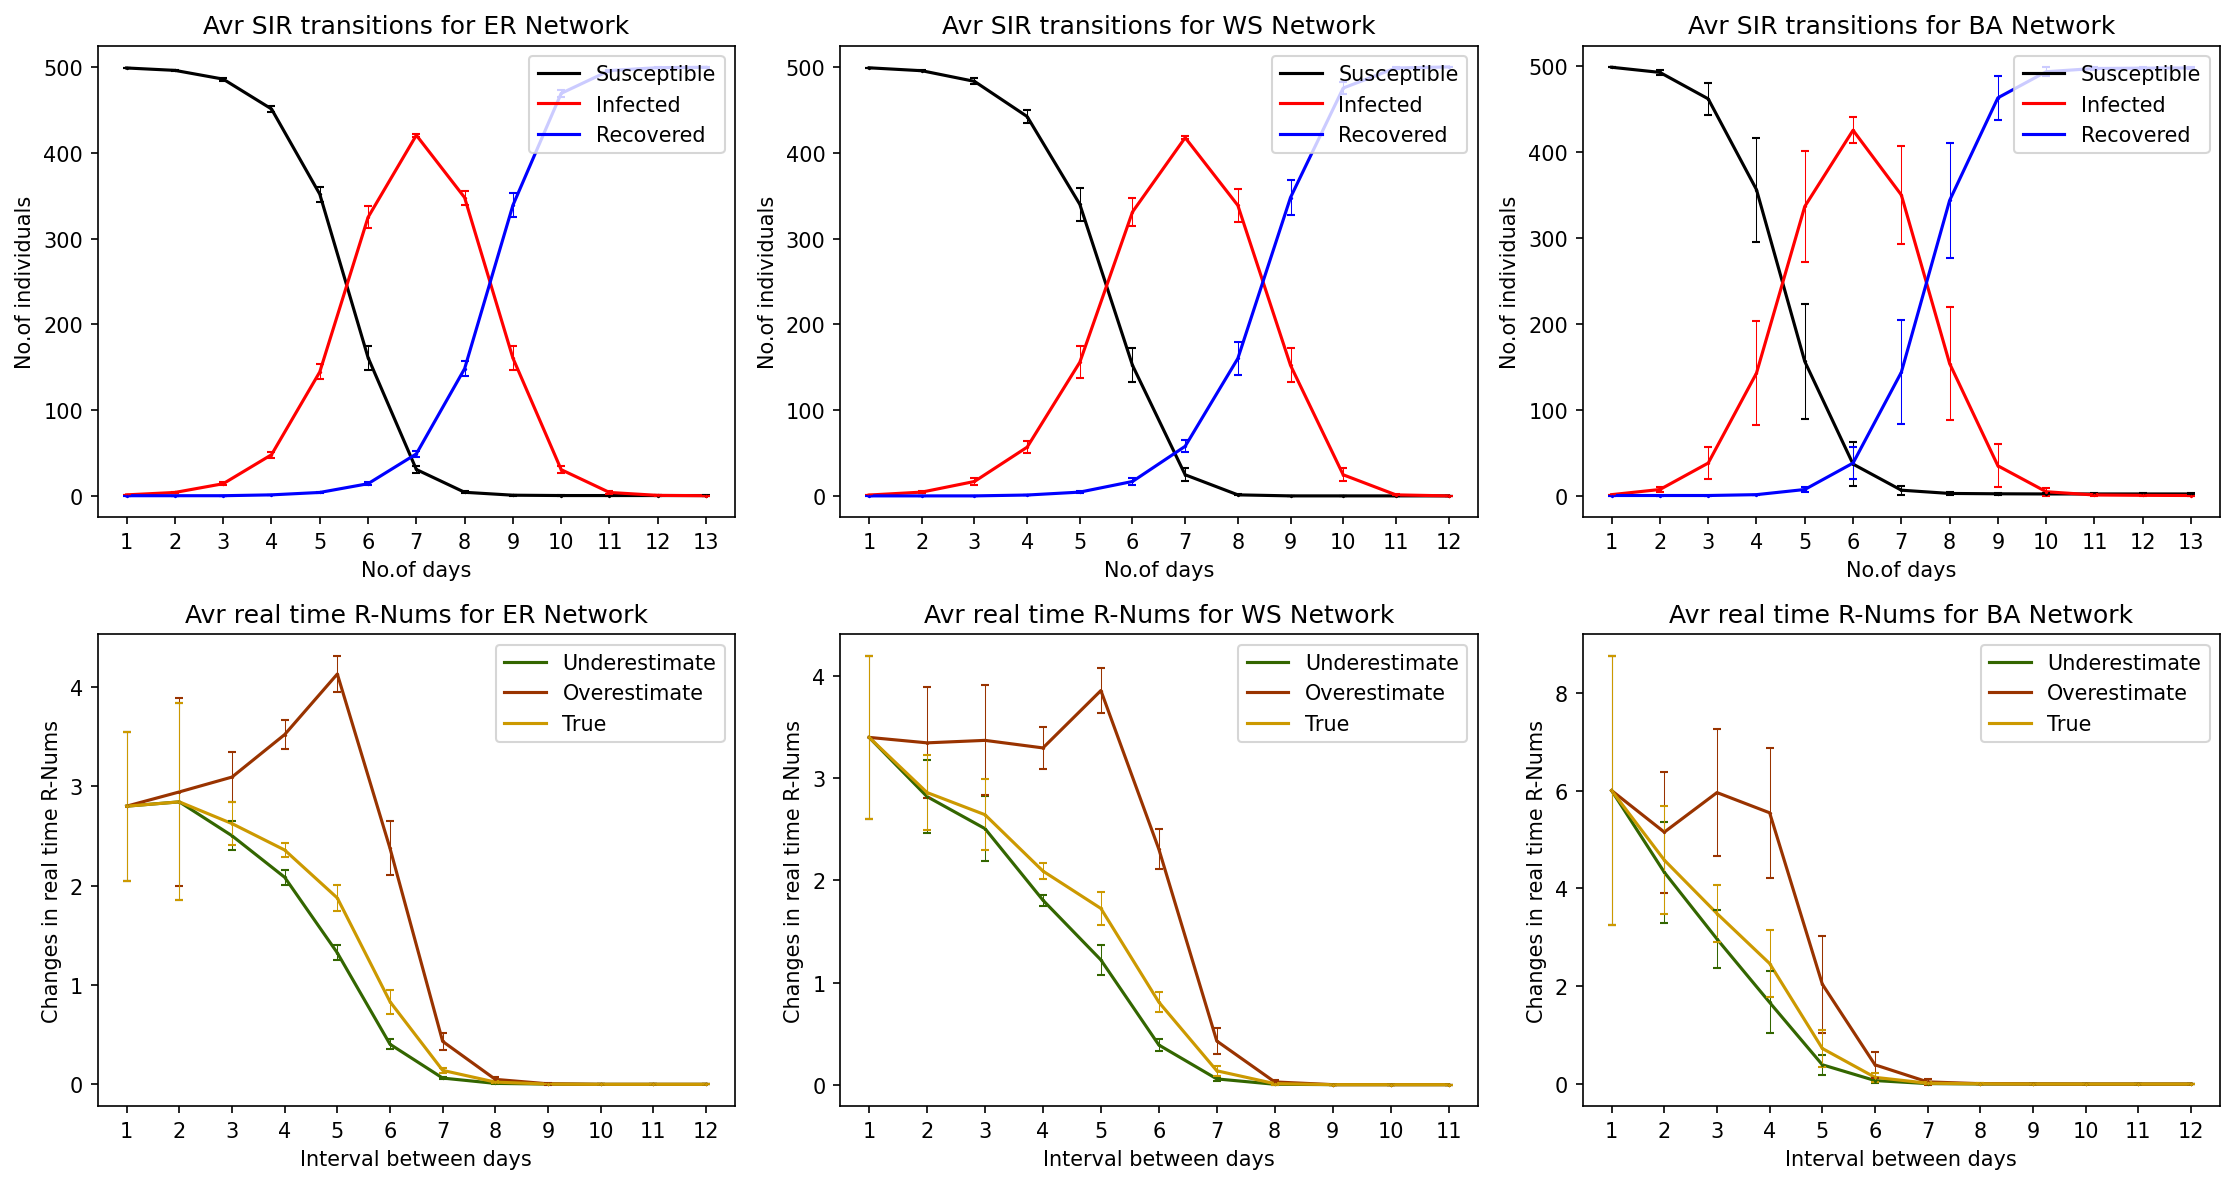

In [15]:
fig, axs = plt.subplots(2,3, figsize = (15,8))

#PLOT SIR FOR NETWORKS
#ER
axs[0][0].plot(ER_average_simulation_result[0][0], ER_average_simulation_result[0][1], label  = "Susceptible", color = 'k')
axs[0][0].plot(ER_average_simulation_result[0][0], ER_average_simulation_result[0][2], label  = "Infected", color = 'r')
axs[0][0].plot(ER_average_simulation_result[0][0], ER_average_simulation_result[0][3], label  = "Recovered", color = 'b')
axs[0][0].errorbar(ER_average_simulation_result[0][0], ER_average_simulation_result[0][1] , \
                   yerr = ER_average_simulation_result[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][0].errorbar(ER_average_simulation_result[0][0], ER_average_simulation_result[0][2] , \
                   yerr = ER_average_simulation_result[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][0].errorbar(ER_average_simulation_result[0][0], ER_average_simulation_result[0][3] , \
                   yerr = ER_average_simulation_result[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][0].set_xticks(np.arange(ER_average_simulation_result[0][0][0], ER_average_simulation_result[0][0][-1] + 1))
axs[0][0].set_xlabel("No.of days")
axs[0][0].set_ylabel("No.of individuals")
axs[0][0].set_title("Avr SIR transitions for ER Network")
axs[0][0].legend(loc = 1)

#WS
axs[0][1].plot(WS_average_simulation_result[0][0], WS_average_simulation_result[0][1], label  = "Susceptible", color = 'k')
axs[0][1].plot(WS_average_simulation_result[0][0], WS_average_simulation_result[0][2], label  = "Infected", color = 'r')
axs[0][1].plot(WS_average_simulation_result[0][0], WS_average_simulation_result[0][3], label  = "Recovered", color = 'b')
axs[0][1].errorbar(WS_average_simulation_result[0][0], WS_average_simulation_result[0][1] , \
                   yerr = WS_average_simulation_result[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][1].errorbar(WS_average_simulation_result[0][0], WS_average_simulation_result[0][2] , \
                   yerr = WS_average_simulation_result[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][1].errorbar(WS_average_simulation_result[0][0], WS_average_simulation_result[0][3] , \
                   yerr = WS_average_simulation_result[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][1].set_xlabel("No.of days")
axs[0][1].set_ylabel("No.of individuals")
axs[0][1].set_xticks(np.arange(WS_average_simulation_result[0][0][0], WS_average_simulation_result[0][0][-1] + 1))
axs[0][1].set_title("Avr SIR transitions for WS Network")
axs[0][1].legend(loc = 1)

#BA
axs[0][2].plot(BA_average_simulation_result[0][0], BA_average_simulation_result[0][1], label  = "Susceptible", color = 'k')
axs[0][2].plot(BA_average_simulation_result[0][0], BA_average_simulation_result[0][2], label  = "Infected", color = 'r')
axs[0][2].plot(BA_average_simulation_result[0][0], BA_average_simulation_result[0][3], label  = "Recovered", color = 'b')
axs[0][2].errorbar(BA_average_simulation_result[0][0], BA_average_simulation_result[0][1] , \
                   yerr = BA_average_simulation_result[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][2].errorbar(BA_average_simulation_result[0][0], BA_average_simulation_result[0][2] , \
                   yerr = BA_average_simulation_result[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][2].errorbar(BA_average_simulation_result[0][0], BA_average_simulation_result[0][3] , \
                   yerr = BA_average_simulation_result[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][2].set_xlabel("No.of days")
axs[0][2].set_ylabel("No.of individuals")
axs[0][2].set_xticks(np.arange(BA_average_simulation_result[0][0][0], BA_average_simulation_result[0][0][-1] + 1))
axs[0][2].set_title("Avr SIR transitions for BA Network")
axs[0][2].legend(loc = 1)

#####################################################################################################

#PLOT REPRODUCTION NUMBERS FOR NETWORKS
#ER
axs[1][0].plot(ER_average_simulation_result[1][0], ER_average_simulation_result[1][1], label  = "Underestimate", color = '#336600')
axs[1][0].plot(ER_average_simulation_result[1][0], ER_average_simulation_result[1][2], label  = "Overestimate", color = '#993300')
axs[1][0].plot(ER_average_simulation_result[1][0], ER_average_simulation_result[1][3], label  = "True", color = '#cc9900')
axs[1][0].errorbar(ER_average_simulation_result[1][0], ER_average_simulation_result[1][1] , \
                   yerr = ER_average_simulation_result[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][0].errorbar(ER_average_simulation_result[1][0], ER_average_simulation_result[1][2] , \
                   yerr = ER_average_simulation_result[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][0].errorbar(ER_average_simulation_result[1][0], ER_average_simulation_result[1][3] , \
                   yerr = ER_average_simulation_result[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][0].set_xticks(np.arange(ER_average_simulation_result[1][0][0], ER_average_simulation_result[1][0][-1] + 1))
axs[1][0].set_xlabel("Interval between days")
axs[1][0].set_ylabel("Changes in real time R-Nums")
axs[1][0].set_title("Avr real time R-Nums for ER Network")
axs[1][0].legend(loc = 1)

#WS
axs[1][1].plot(WS_average_simulation_result[1][0], WS_average_simulation_result[1][1], label  = "Underestimate", color = '#336600')
axs[1][1].plot(WS_average_simulation_result[1][0], WS_average_simulation_result[1][2], label  = "Overestimate", color = '#993300')
axs[1][1].plot(WS_average_simulation_result[1][0], WS_average_simulation_result[1][3], label  = "True", color = '#cc9900')
axs[1][1].errorbar(WS_average_simulation_result[1][0], WS_average_simulation_result[1][1] , \
                   yerr = WS_average_simulation_result[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][1].errorbar(WS_average_simulation_result[1][0], WS_average_simulation_result[1][2] , \
                   yerr = WS_average_simulation_result[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][1].errorbar(WS_average_simulation_result[1][0], WS_average_simulation_result[1][3] , \
                   yerr = WS_average_simulation_result[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][1].set_xticks(np.arange(WS_average_simulation_result[1][0][0], WS_average_simulation_result[1][0][-1] + 1))
axs[1][1].set_xlabel("Interval between days")
axs[1][1].set_ylabel("Changes in real time R-Nums")
axs[1][1].set_title("Avr real time R-Nums for WS Network")
axs[1][1].legend(loc = 1)

#BA
axs[1][2].plot(BA_average_simulation_result[1][0], BA_average_simulation_result[1][1], label  = "Underestimate", color = '#336600')
axs[1][2].plot(BA_average_simulation_result[1][0], BA_average_simulation_result[1][2], label  = "Overestimate", color = '#993300')
axs[1][2].plot(BA_average_simulation_result[1][0], BA_average_simulation_result[1][3], label  = "True", color = '#cc9900')
axs[1][2].errorbar(BA_average_simulation_result[1][0], BA_average_simulation_result[1][1] , \
                   yerr = BA_average_simulation_result[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][2].errorbar(BA_average_simulation_result[1][0], BA_average_simulation_result[1][2] , \
                   yerr = BA_average_simulation_result[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][2].errorbar(BA_average_simulation_result[1][0], BA_average_simulation_result[1][3] , \
                   yerr = BA_average_simulation_result[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][2].set_xticks(np.arange(BA_average_simulation_result[1][0][0], BA_average_simulation_result[1][0][-1] + 1))
axs[1][2].set_xlabel("Interval between days")
axs[1][2].set_ylabel("Changes in real time R-Nums")
axs[1][2].set_title("Avr real time R-Nums for BA Network")
axs[1][2].legend(loc = 1)

fig.tight_layout()
plt.show()

#### <u> 4.1 Results and Discussion </u>

In general, the SIR trends were rather similar across all networks, increasing to a maximum infection peak $>$ 400 at $t_6$ before declining. This can be explained if we observe $r_T$ at $t_6$, where all $r_t$ goes $< 1/2$ ($r_T$ = 0.31, 0.433, 0.13 for ER, WS & BA respectively), suggesting that an infected individual on average infects less than one susceptible individual. <br>

As for the reproduction numbers there are several observations we can make.
1. There is a consistent trend that $r_U \leq r_T \leq r_O$. This is unsurprising due to the manner we define and construct the respective reproduction numbers.<br>

2. All reproduction numbers at $t_1$ fulfil the closeness of 95% we desire which suggests adequacy in the number of simulations we run. However, a point to note is that the standard deviation for the BA network's reproduction number at $t_1$ is significantly larger than the ER and WS network ($\pm 4$ compared to ~$\pm2$). <br>

3. $r_T$ for ER and WS networks exhibit a declining trend throughout whereas that of BA network shows a sharp increment at $t_2$ before decreasing. This suggests that an epidemic for a BA network at the initial stage may be of an exploding nature compared to that of ER and WS, which diminishes gradually. <br>

4. Across all networks, $r_T$ follows closer to $r_U$ and differs from $r_O$ in the time interval $t_2$ to maximum infected number at $t_6$. This suggests that the actual transmission of a virus is lesser as the epidemic grows, which corroborates with our intuition. <br> 

Now that we caught a glimpse of the general trends for the reproduction numbers in different networks, we shall explore the effects caused by $r_l$ and $D_{recover}$.

#### <u> 5. Effects of different $r_l$ and $D_{recover}$ parameters</u>
In this section, we explore the effects caused by different $r_l$ and $D_{recover}$ when we take the canonical average of 5000 simulations.

#### <u> 5.1 Effects caused by $r_l$ </u>
We shall compare $r_l$: {3, 5, 7, 9} across all networks, with $D_{recover}$ = 3 and $I_0$ = 1. The results are shown below. In each plot, the closeness to $r_l$ is confirmed to be at least 95%. From the graphs, there are 3 main observations we can make:

In [15]:
np.random.seed(43434)
number_of_simulations = 50
N_simulation_seeds = np.random.choice(1000000, number_of_simulations, replace = False)

#Smallest r_l (set as 0.5 as a default)
I0 = 1
D_recover = 3

ER_r_l = np.array([3, 5, 7, 9])
WS_r_l = np.array([3, 5, 7, 9])
BA_r_l = np.array([3, 5, 7, 9])

In [16]:
ER_average_simulation_result_r_l = []
ER_average_ensemble_local_r_l = []

WS_average_simulation_result_r_l = []
WS_average_ensemble_local_r_l = []

BA_average_simulation_result_r_l = []
BA_average_ensemble_local_r_l = []

for a in ER_r_l:
    ER_N_runs_r_l = simulation(I0, D_recover, a, ER_network, N_simulation_seeds,0)[0:-1]
    ER_N_runs_average_r_l = simulation_average(ER_N_runs_r_l, number_of_simulations)[1:3]
    ER_N_runs_ensemble_local = 1 - ((abs(a - ER_N_runs_average_r_l[-1])) / a)
    ER_average_simulation_result_r_l.append(ER_N_runs_average_r_l[0])
    ER_average_ensemble_local_r_l.append(ER_N_runs_ensemble_local)

for b in WS_r_l:
    WS_N_runs_r_l = simulation(I0, D_recover, b, WS_network, N_simulation_seeds,0)[0:-1]
    WS_N_runs_average_r_l = simulation_average(WS_N_runs_r_l, number_of_simulations)[1:3]
    WS_N_runs_ensemble_local = 1 - ((abs(b - WS_N_runs_average_r_l[-1])) / b)
    WS_average_simulation_result_r_l.append(WS_N_runs_average_r_l[0])
    WS_average_ensemble_local_r_l.append(WS_N_runs_ensemble_local)
    
for c in BA_r_l:
    BA_N_runs_r_l = simulation(I0, D_recover, c, BA_network, N_simulation_seeds,0)[0:-1]
    BA_N_runs_average_r_l = simulation_average(BA_N_runs_r_l, number_of_simulations)[1:3]
    BA_N_runs_ensemble_local = 1 - ((abs(c - BA_N_runs_average_r_l[-1])) / c)
    BA_average_simulation_result_r_l.append(BA_N_runs_average_r_l[0])
    BA_average_ensemble_local_r_l.append(BA_N_runs_ensemble_local)


####################################^ CODE ABOVE^############################

#ER_average_simulation_result_r_l[0] - result from ER_r_l[0]
#ER_average_simulation_result_r_l[0][0] - result from ER_r_l[0]'s time scale
#ER_average_simulation_result_r_l[0][1], [2], [3] - average result from ER_r_l[0]'s r_U, r_O, r_t
#ER_average_simulation_result_r_l[0][4], [5], [6] - SD from ER_r_l[0]'s r_U, r_O, r_t

# TOOK 9 HOURS PLS DONT RUN AGAIN (5000 runs)

In [17]:
#cLOSENESS TO Local reproduction number
print(np.around(ER_average_ensemble_local_r_l, decimals = 2))
print(np.around(WS_average_ensemble_local_r_l, decimals = 2))
print(np.around(BA_average_ensemble_local_r_l, decimals = 2))

[1.   0.99 1.   1.  ]
[1. 1. 1. 1.]
[0.97 0.97 0.98 0.98]


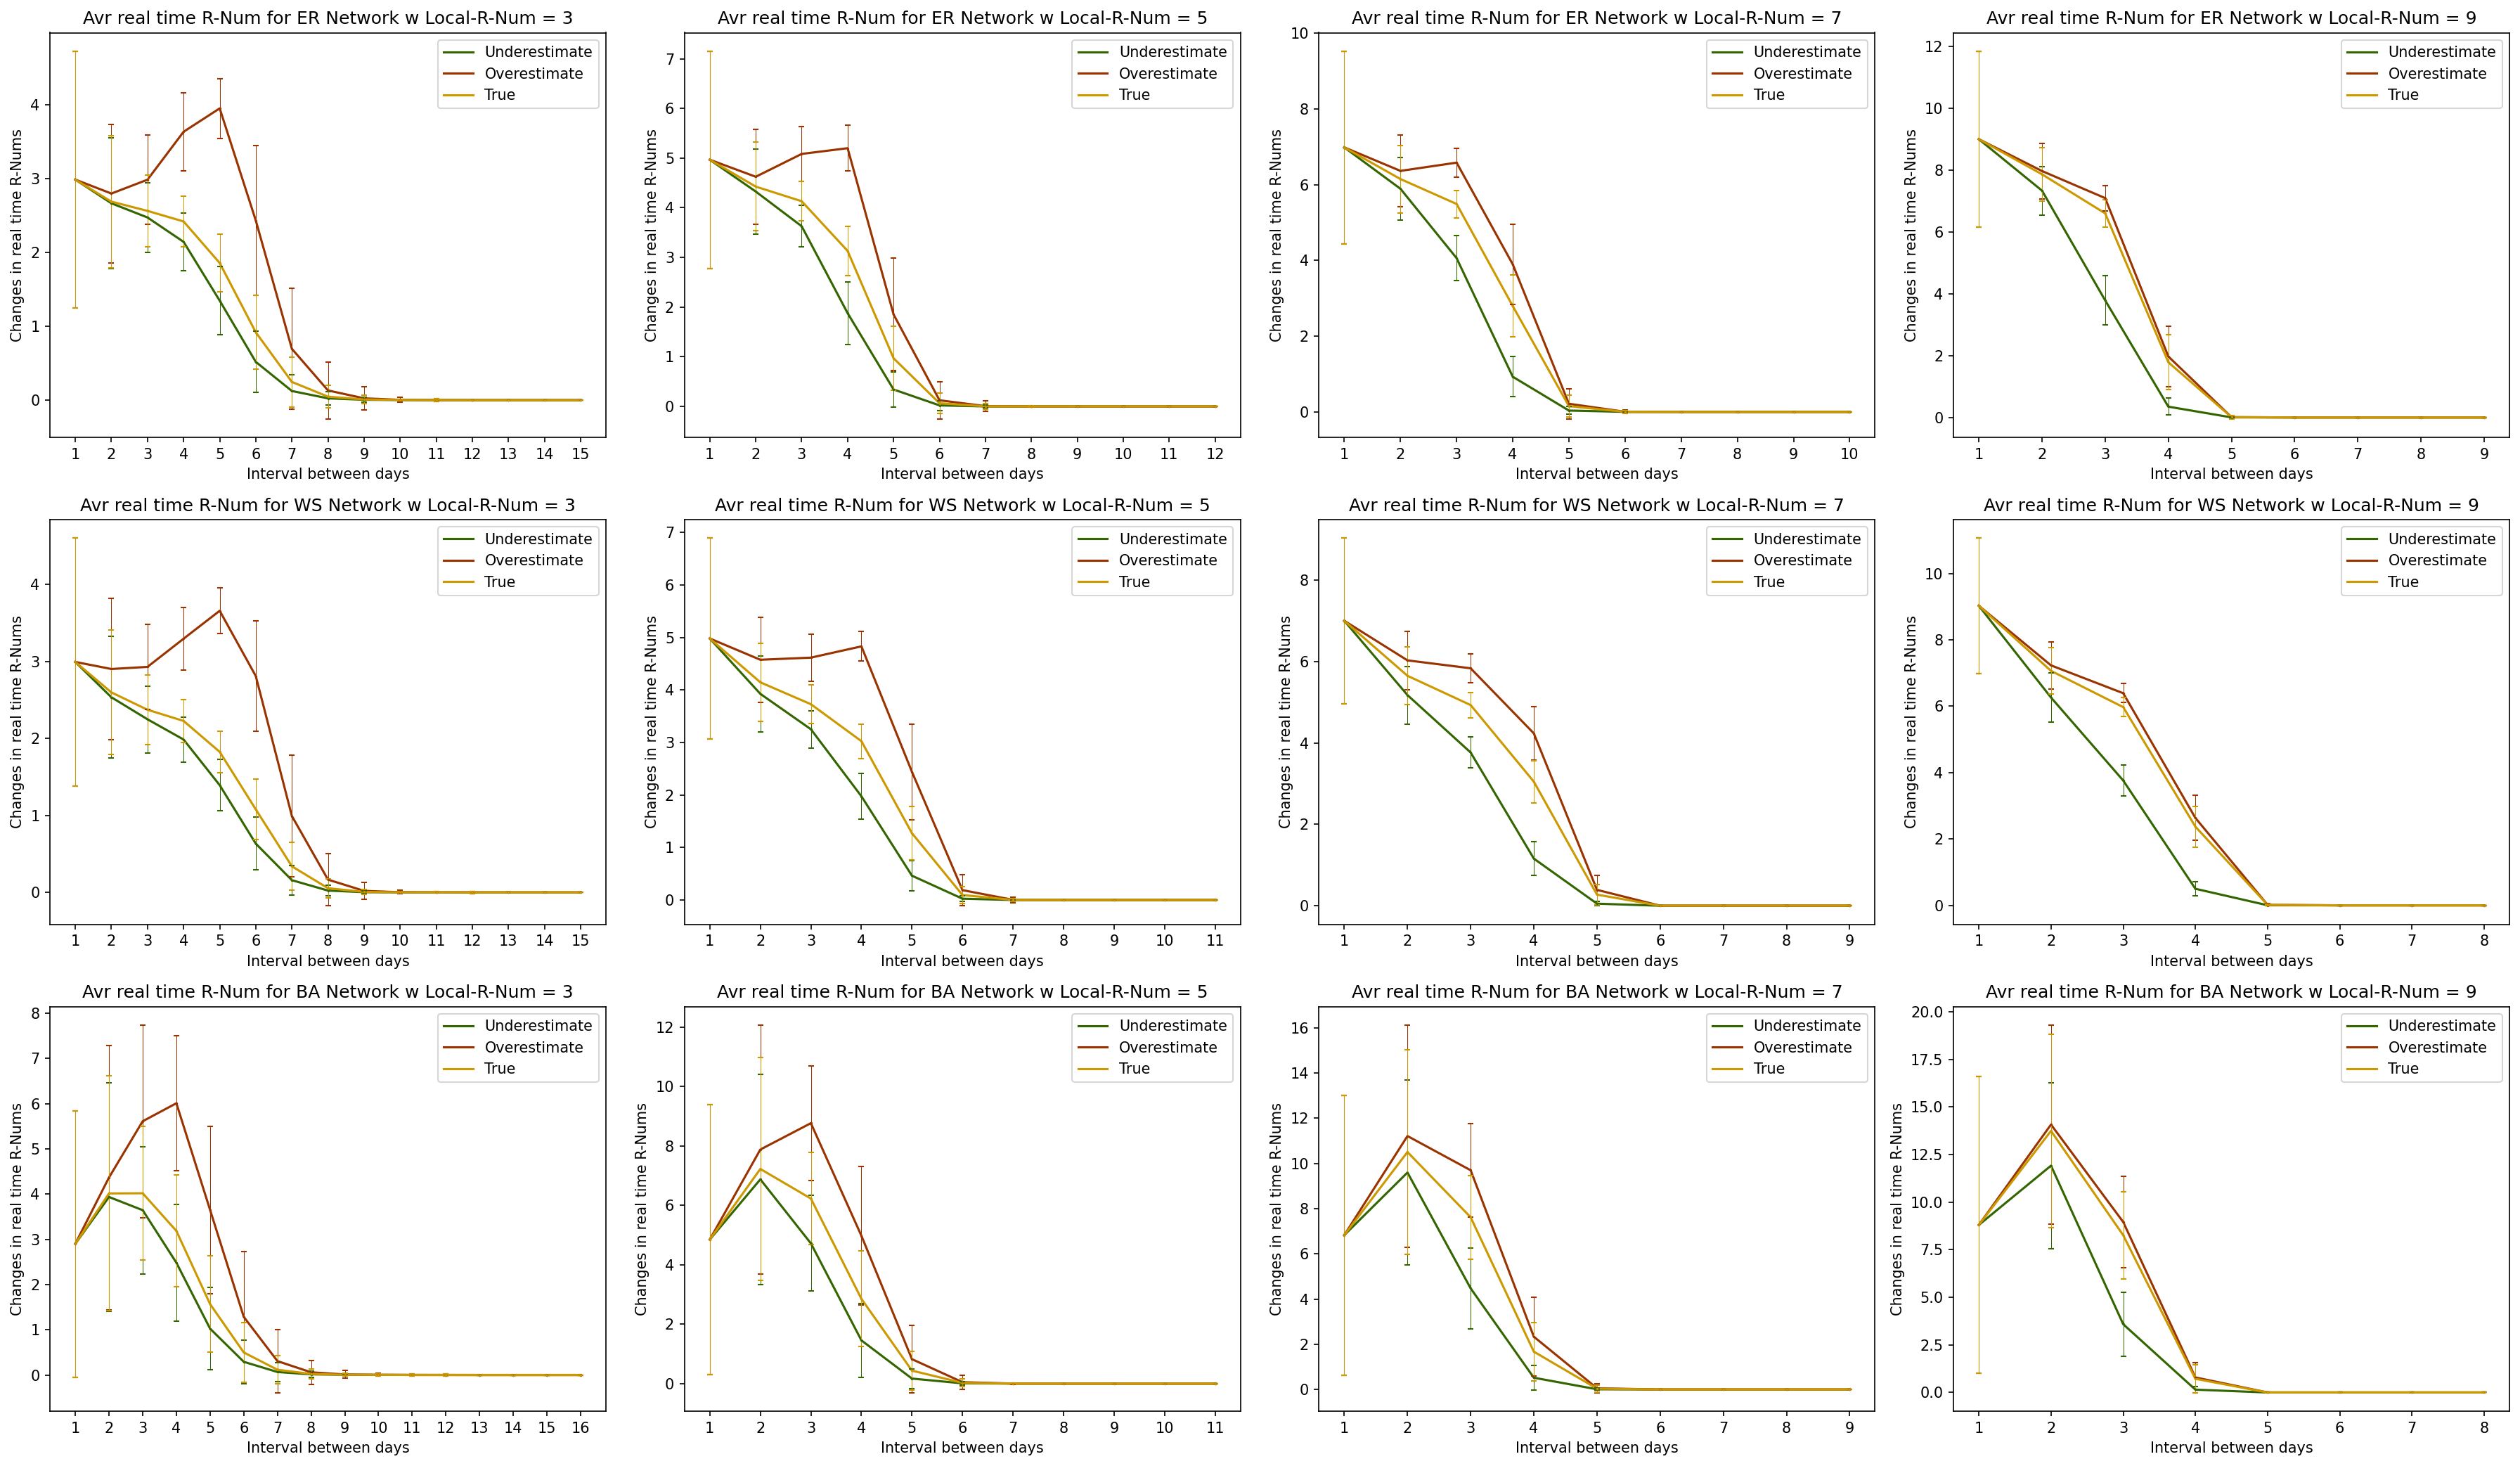

In [18]:
#Graph of different r_l on Reproduction Numbers
fig, axs = plt.subplots(3, len(ER_r_l), figsize = (24,14))

#Used to plot ER
for i in range(len(ER_average_simulation_result_r_l)):
    axs[0][i].plot(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][1], label  = "Underestimate", color = '#336600')
    axs[0][i].plot(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][2], label  = "Overestimate", color = '#993300')
    axs[0][i].plot(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3], label  = "True", color = '#cc9900')
    axs[0][i].errorbar(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][1] , \
                       yerr = ER_average_simulation_result_r_l[i][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#336600')
    axs[0][i].errorbar(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][2] , \
                       yerr = ER_average_simulation_result_r_l[i][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#993300')
    axs[0][i].errorbar(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3] , \
                       yerr = ER_average_simulation_result_r_l[i][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#cc9900')
    axs[0][i].set_xticks(np.arange(ER_average_simulation_result_r_l[i][0][0], ER_average_simulation_result_r_l[i][0][-1] + 1, 1))
    ER_title_label= "Avr real time R-Num for ER Network w Local-R-Num = " + str(ER_r_l[i])
    axs[0][i].set_title(ER_title_label)
    axs[0][i].set_xlabel("Interval between days")
    axs[0][i].set_ylabel("Changes in real time R-Nums")
    axs[0][i].legend(loc = 1)
    
#Used to plot WS
for j in range(len(WS_average_simulation_result_r_l)):
    axs[1][j].plot(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][1], label  = "Underestimate", color = '#336600')
    axs[1][j].plot(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][2], label  = "Overestimate", color = '#993300')
    axs[1][j].plot(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][3], label  = "True", color = '#cc9900')
    axs[1][j].errorbar(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][1] , \
                       yerr = WS_average_simulation_result_r_l[j][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#336600')
    axs[1][j].errorbar(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][2] , \
                       yerr = WS_average_simulation_result_r_l[j][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#993300')
    axs[1][j].errorbar(WS_average_simulation_result_r_l[j][0], WS_average_simulation_result_r_l[j][3] , \
                       yerr = WS_average_simulation_result_r_l[j][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#cc9900')
    axs[1][j].set_xticks(np.arange(WS_average_simulation_result_r_l[j][0][0], WS_average_simulation_result_r_l[j][0][-1] + 1, 1))
    WS_title_label= "Avr real time R-Num for WS Network w Local-R-Num = " + str(WS_r_l[j])
    axs[1][j].set_xlabel("Interval between days")
    axs[1][j].set_ylabel("Changes in real time R-Nums")
    axs[1][j].set_title(WS_title_label)
    axs[1][j].legend(loc = 1)    
    
#Used to plot BA
for k in range(len(BA_average_simulation_result_r_l)):
    axs[2][k].plot(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][1], label  = "Underestimate", color = '#336600')
    axs[2][k].plot(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][2], label  = "Overestimate", color = '#993300')
    axs[2][k].plot(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][3], label  = "True", color = '#cc9900')
    axs[2][k].errorbar(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][1] , \
                       yerr = BA_average_simulation_result_r_l[k][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#336600')
    axs[2][k].errorbar(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][2] , \
                       yerr = BA_average_simulation_result_r_l[k][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#993300')
    axs[2][k].errorbar(BA_average_simulation_result_r_l[k][0], BA_average_simulation_result_r_l[k][3] , \
                       yerr = BA_average_simulation_result_r_l[k][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                       capsize = 2, color = '#cc9900')
    axs[2][k].set_xticks(np.arange(BA_average_simulation_result_r_l[k][0][0], BA_average_simulation_result_r_l[k][0][-1] + 1, 1))
    BA_title_label= "Avr real time R-Num for BA Network w Local-R-Num = " + str(BA_r_l[k])
    axs[2][k].set_xlabel("Interval between days")
    axs[2][k].set_ylabel("Changes in real time R-Nums")
    axs[2][k].set_title(BA_title_label)
    axs[2][k].legend(loc = 1)    

plt.tight_layout()
plt.show()

#### <u> 5.1.1 Results & Discussion (a) </u>
From the plots, we notice a similarity across different $r_l$ in each network. For $r_l$ = 3 all networks have $r_t$ closer to $r_U$. However, as $r_l$ increases till 9, all $r_t$ in the network tend towards the overestimate $r_O$. This is unsurprising as $r_l$ is directly proportional to the probability of transmission of the virus and hence, a larger $r_l$ signifies a larger <b>$p_T$</b>. This suggests that most infected neighbours will transmit the virus to his susceptible counterparts, therefore registering a true reproduction number closer to that of the overestimate! <br>

#### <u> 5.1.1 Results & Discussion (c) </u>

Lastly, apart from the trend in $r_t$, we also notice that the duration of epidemic decrease with increasing $r_l$ for different networks. This can be explained with higher $p_T$ as $r_l$ increases. As $p_T$ increases, the probability of virus transmission is larger, allowing the possibility for more individuals to get infected quicker. This can be verified with $r_t$ for all networks (see below), where $r_t$ is consistently larger for larger $r_l$ at the initial few time steps, and dies down much quicker, consequently ending the epidemic sooner. <br>

We may also deduce that the duration of an epidemic is more closely related to the transmissibility of a virus rather than the social construct of the community (type of network), since all networks show that a larger $r_l$ will have a shorter epidemic duration. 

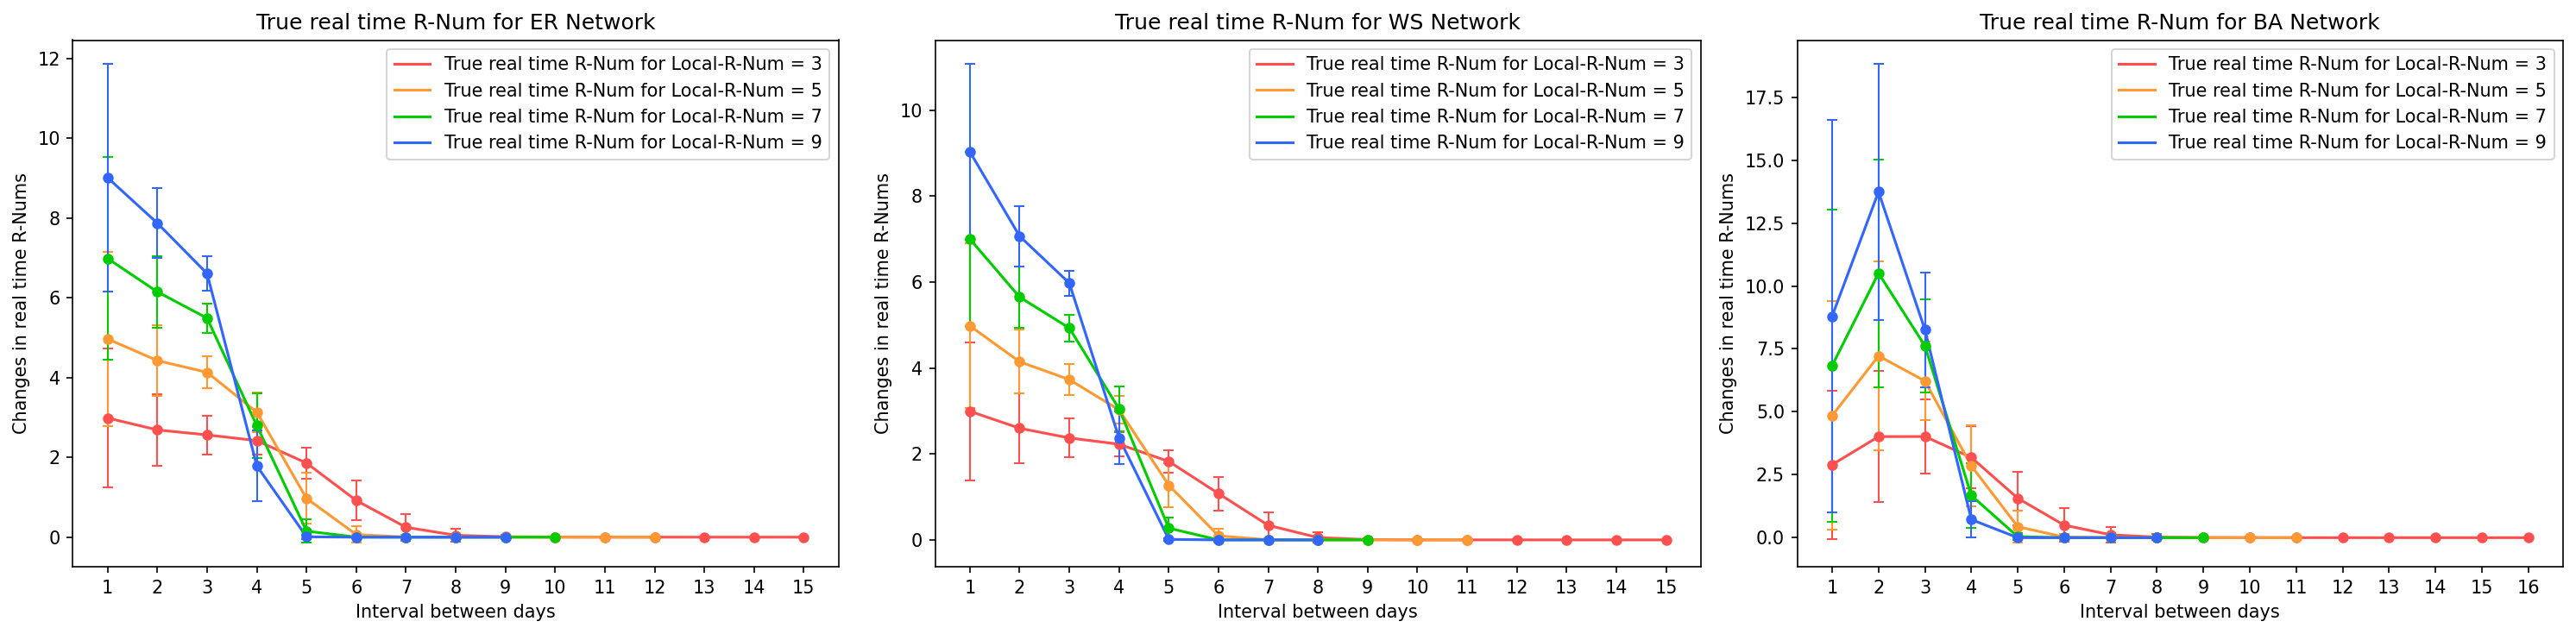

In [81]:
fig, axs = plt.subplots(1,3, figsize = (20, 5))
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 

for i in range(len(ER_r_l)):
    ER_label_r_l = "True real time R-Num for Local-R-Num = " + str(ER_r_l[i])
    axs[0].plot(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3], label  = ER_label_r_l, \
               color = plot_colors[i])
    axs[0].errorbar(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3] , \
                    yerr = ER_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 5, elinewidth = 1, \
                    capsize = 3, color = plot_colors[i])
    axs[0].set_xticks(np.arange(ER_average_simulation_result_r_l[0][0][0], ER_average_simulation_result_r_l[0][0][-1] + 1, 1))
    ER_title_label= "True real time R-Num for ER Network"
    axs[0].set_xlabel("Interval between days")
    axs[0].set_ylabel("Changes in real time R-Nums")
    axs[0].set_title(ER_title_label)
    axs[0].legend(loc = 1)    

for i in range(len(WS_r_l)):
    WS_label_r_l = "True real time R-Num for Local-R-Num = " + str(WS_r_l[i])
    axs[1].plot(WS_average_simulation_result_r_l[i][0], WS_average_simulation_result_r_l[i][3], label  = WS_label_r_l, \
               color = plot_colors[i])
    axs[1].errorbar(WS_average_simulation_result_r_l[i][0], WS_average_simulation_result_r_l[i][3] , \
                    yerr = WS_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 5, elinewidth = 1, \
                    capsize = 3, color = plot_colors[i])
    axs[1].set_xticks(np.arange(WS_average_simulation_result_r_l[0][0][0], WS_average_simulation_result_r_l[0][0][-1] + 1, 1))
    WS_title_label= "True real time R-Num for WS Network"
    axs[1].set_xlabel("Interval between days")
    axs[1].set_ylabel("Changes in real time R-Nums")
    axs[1].set_title(WS_title_label)
    axs[1].legend(loc = 1)    
    
for i in range(len(BA_r_l)):
    BA_label_r_l = "True real time R-Num for Local-R-Num = " + str(BA_r_l[i])
    axs[2].plot(BA_average_simulation_result_r_l[i][0], BA_average_simulation_result_r_l[i][3], label  = BA_label_r_l, \
               color = plot_colors[i])
    axs[2].errorbar(BA_average_simulation_result_r_l[i][0], BA_average_simulation_result_r_l[i][3] , \
                    yerr = BA_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 5, elinewidth = 1, \
                    capsize = 3, color = plot_colors[i])
    axs[2].set_xticks(np.arange(BA_average_simulation_result_r_l[0][0][0], BA_average_simulation_result_r_l[0][0][-1] + 1, 1))
    BA_title_label= "True real time R-Num for BA Network"
    axs[2].set_xlabel("Interval between days")
    axs[2].set_ylabel("Changes in real time R-Nums")
    axs[2].set_title(BA_title_label)
    axs[2].legend(loc = 1)    

fig.tight_layout()
plt.show()

#### <u> 5.1.1 Results & Discussion (b)</u>
Next, we are able to confirm the exploding nature of the epidemic outbreak in the BA network by replotting the $r_T$ at for all networks across different $r_l$. As shown in the plots, the $r_T$ for the ER and WS networks declines gradually whereas that of the BA network show a rather large increment from $t_1$ to $t_2$. This sharp jump is even more apprarent for larger $r_l$, though unsurprising.

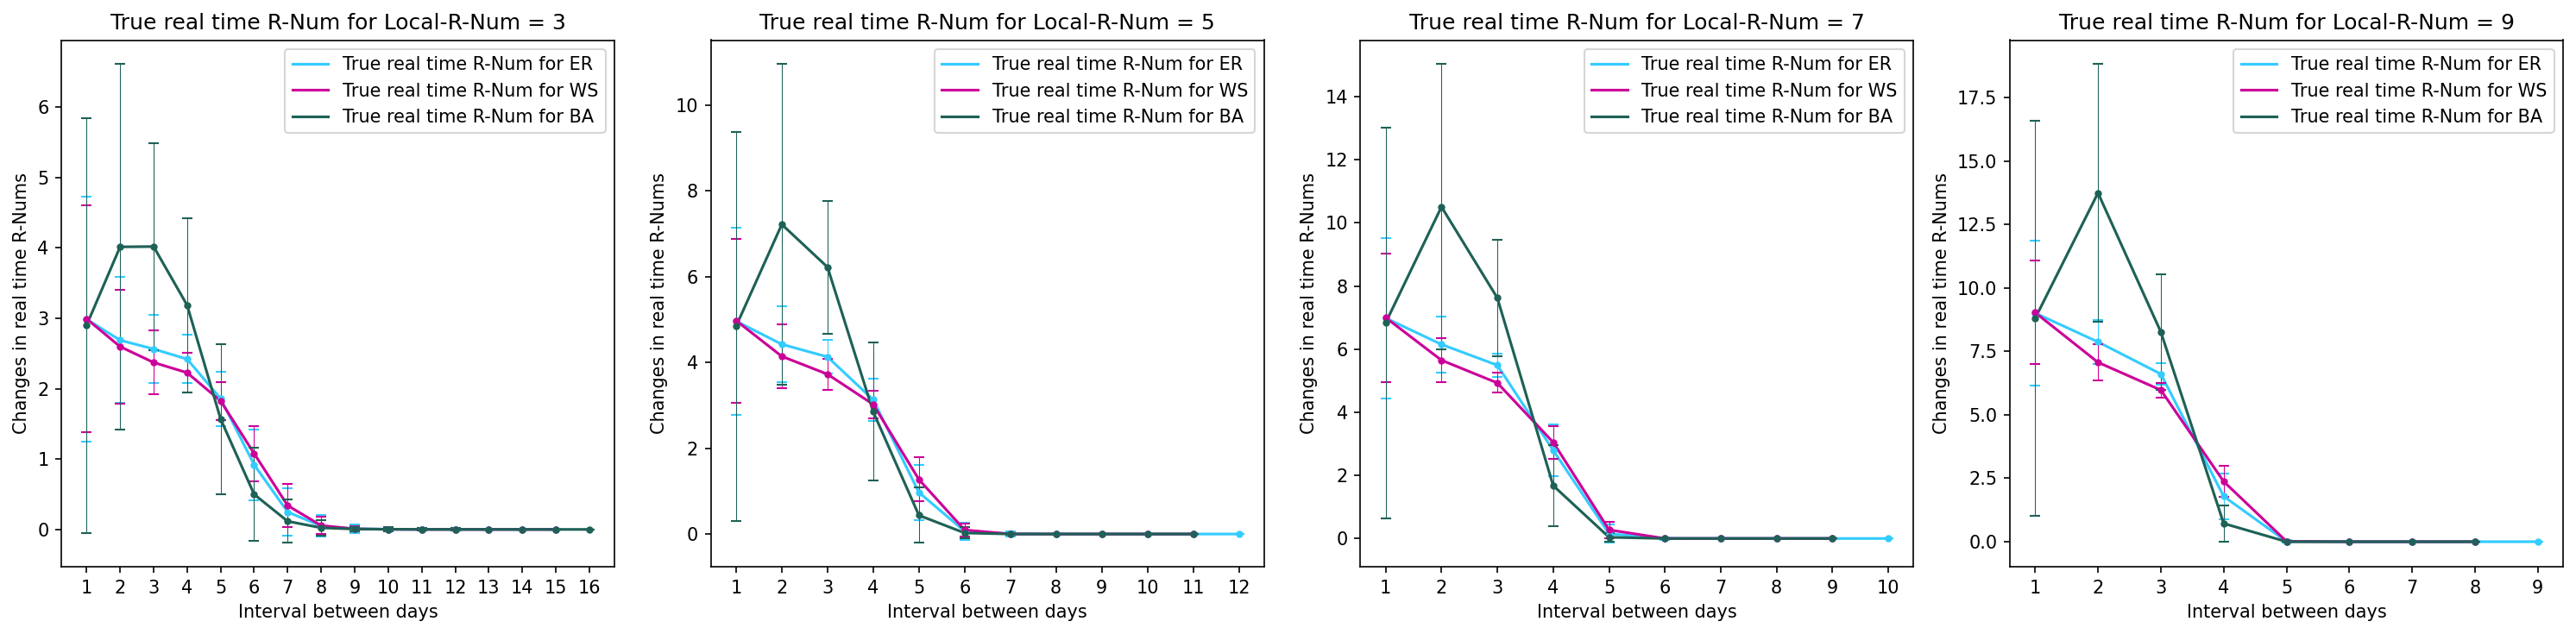

In [94]:
fig, axs = plt.subplots(1,4, figsize = (20,5))

for i in range(len(ER_r_l)):
    axs[i].plot(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3], label  = "True real time R-Num for ER", \
               color = "#33ccff")
    axs[i].errorbar(ER_average_simulation_result_r_l[i][0], ER_average_simulation_result_r_l[i][3] , \
                    yerr = ER_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 3, elinewidth = 0.5, \
                    capsize = 3, color = "#33ccff")
    axs[i].plot(WS_average_simulation_result_r_l[i][0], WS_average_simulation_result_r_l[i][3], label  = "True real time R-Num for WS", \
               color = '#cc0099')
    axs[i].errorbar(WS_average_simulation_result_r_l[i][0], WS_average_simulation_result_r_l[i][3] , \
                    yerr = WS_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 3, elinewidth = 0.5, \
                    capsize = 3, color = '#cc0099')
    axs[i].plot(BA_average_simulation_result_r_l[i][0], BA_average_simulation_result_r_l[i][3], label  = "True real time R-Num for BA", \
               color = '#1e6156')
    axs[i].errorbar(BA_average_simulation_result_r_l[i][0], BA_average_simulation_result_r_l[i][3] , \
                    yerr = BA_average_simulation_result_r_l[i][6], fmt = 'o', markersize = 3, elinewidth = 0.5, \
                    capsize = 3, color = '#1e6156')
    time_max = max(ER_average_simulation_result_r_l[i][0][-1], WS_average_simulation_result_r_l[i][0][-1], BA_average_simulation_result_r_l[i][0][-1])
    axs[i].set_xticks(np.arange(1, time_max + 1, 1))
    Graph_title_label= "True real time R-Num for Local-R-Num = " + str(ER_r_l[i])
    axs[i].set_xlabel("Interval between days")
    axs[i].set_ylabel("Changes in real time R-Nums")
    axs[i].set_title(Graph_title_label)
    axs[i].legend(loc = 1)   
    
fig.tight_layout()
plt.show()

#### <u> 5.2 Effects caused by $D_{recover}$ </u>
We now determine the effect of $D_{recover}$ on different reproduction numbers by setting $D_{recover}$: {1, 3, 5}. Here, we also examine if there are any changes to the closeness of $r_T$ to $r_U$ and $r_O$, by testing the inputs $r_l$ = 3 and 9 for different $D_{recover}$, with $I_0$ = 1. The graphs are plotted below, with each initial outbreak verified to have a closeness of at least 95% to $r_l$.

In [12]:
np.random.seed(43434)
number_of_simulations = 50
N_simulation_seeds = np.random.choice(1000000, number_of_simulations, replace = False)

I0 = 1
r_l = 3
D_recover_array = np.array([1, 3, 5])

In [13]:
# ER_average_simulation_result_D = []
# WS_average_simulation_result_D = []
# BA_average_simulation_result_D = []

# for i in D_recover_array:
#     ER_N_runs_D = simulation(I0, i, r_l, ER_network, N_simulation_seeds,0)[0:-1]
#     ER_N_runs_average_D = simulation_average(ER_N_runs_D, number_of_simulations)[1:3]
#     ER_average_simulation_result_D.append(ER_N_runs_average_D[0])
    
# for j in D_recover_array:
#     WS_N_runs_D = simulation(I0, j, r_l, WS_network, N_simulation_seeds,0)[0:-1]
#     WS_N_runs_average_D = simulation_average(WS_N_runs_D, number_of_simulations)[1:3]
#     WS_average_simulation_result_D.append(WS_N_runs_average_D[0])
    
# for k in D_recover_array:
#     BA_N_runs_D = simulation(I0, k, r_l, BA_network, N_simulation_seeds,0)[0:-1]
#     BA_N_runs_average_D = simulation_average(BA_N_runs_D, number_of_simulations)[1:3]
#     BA_average_simulation_result_D.append(BA_N_runs_average_D[0])
    
########################################################################################################

#ER_average_simulation_result_D[0] - result from ER_D[0]
#ER_average_simulation_result_D[0][0] - result from ER_D[0]'s time scale
#ER_average_simulation_result_D[0][1], [2], [3] - average result from ER_D[0]'s r_U, r_O, r_t
#ER_average_simulation_result_D[0][4], [5], [6] - SD from ER_D[0]'s r_U, r_O, r_t

Duration: 5:42:48.147242


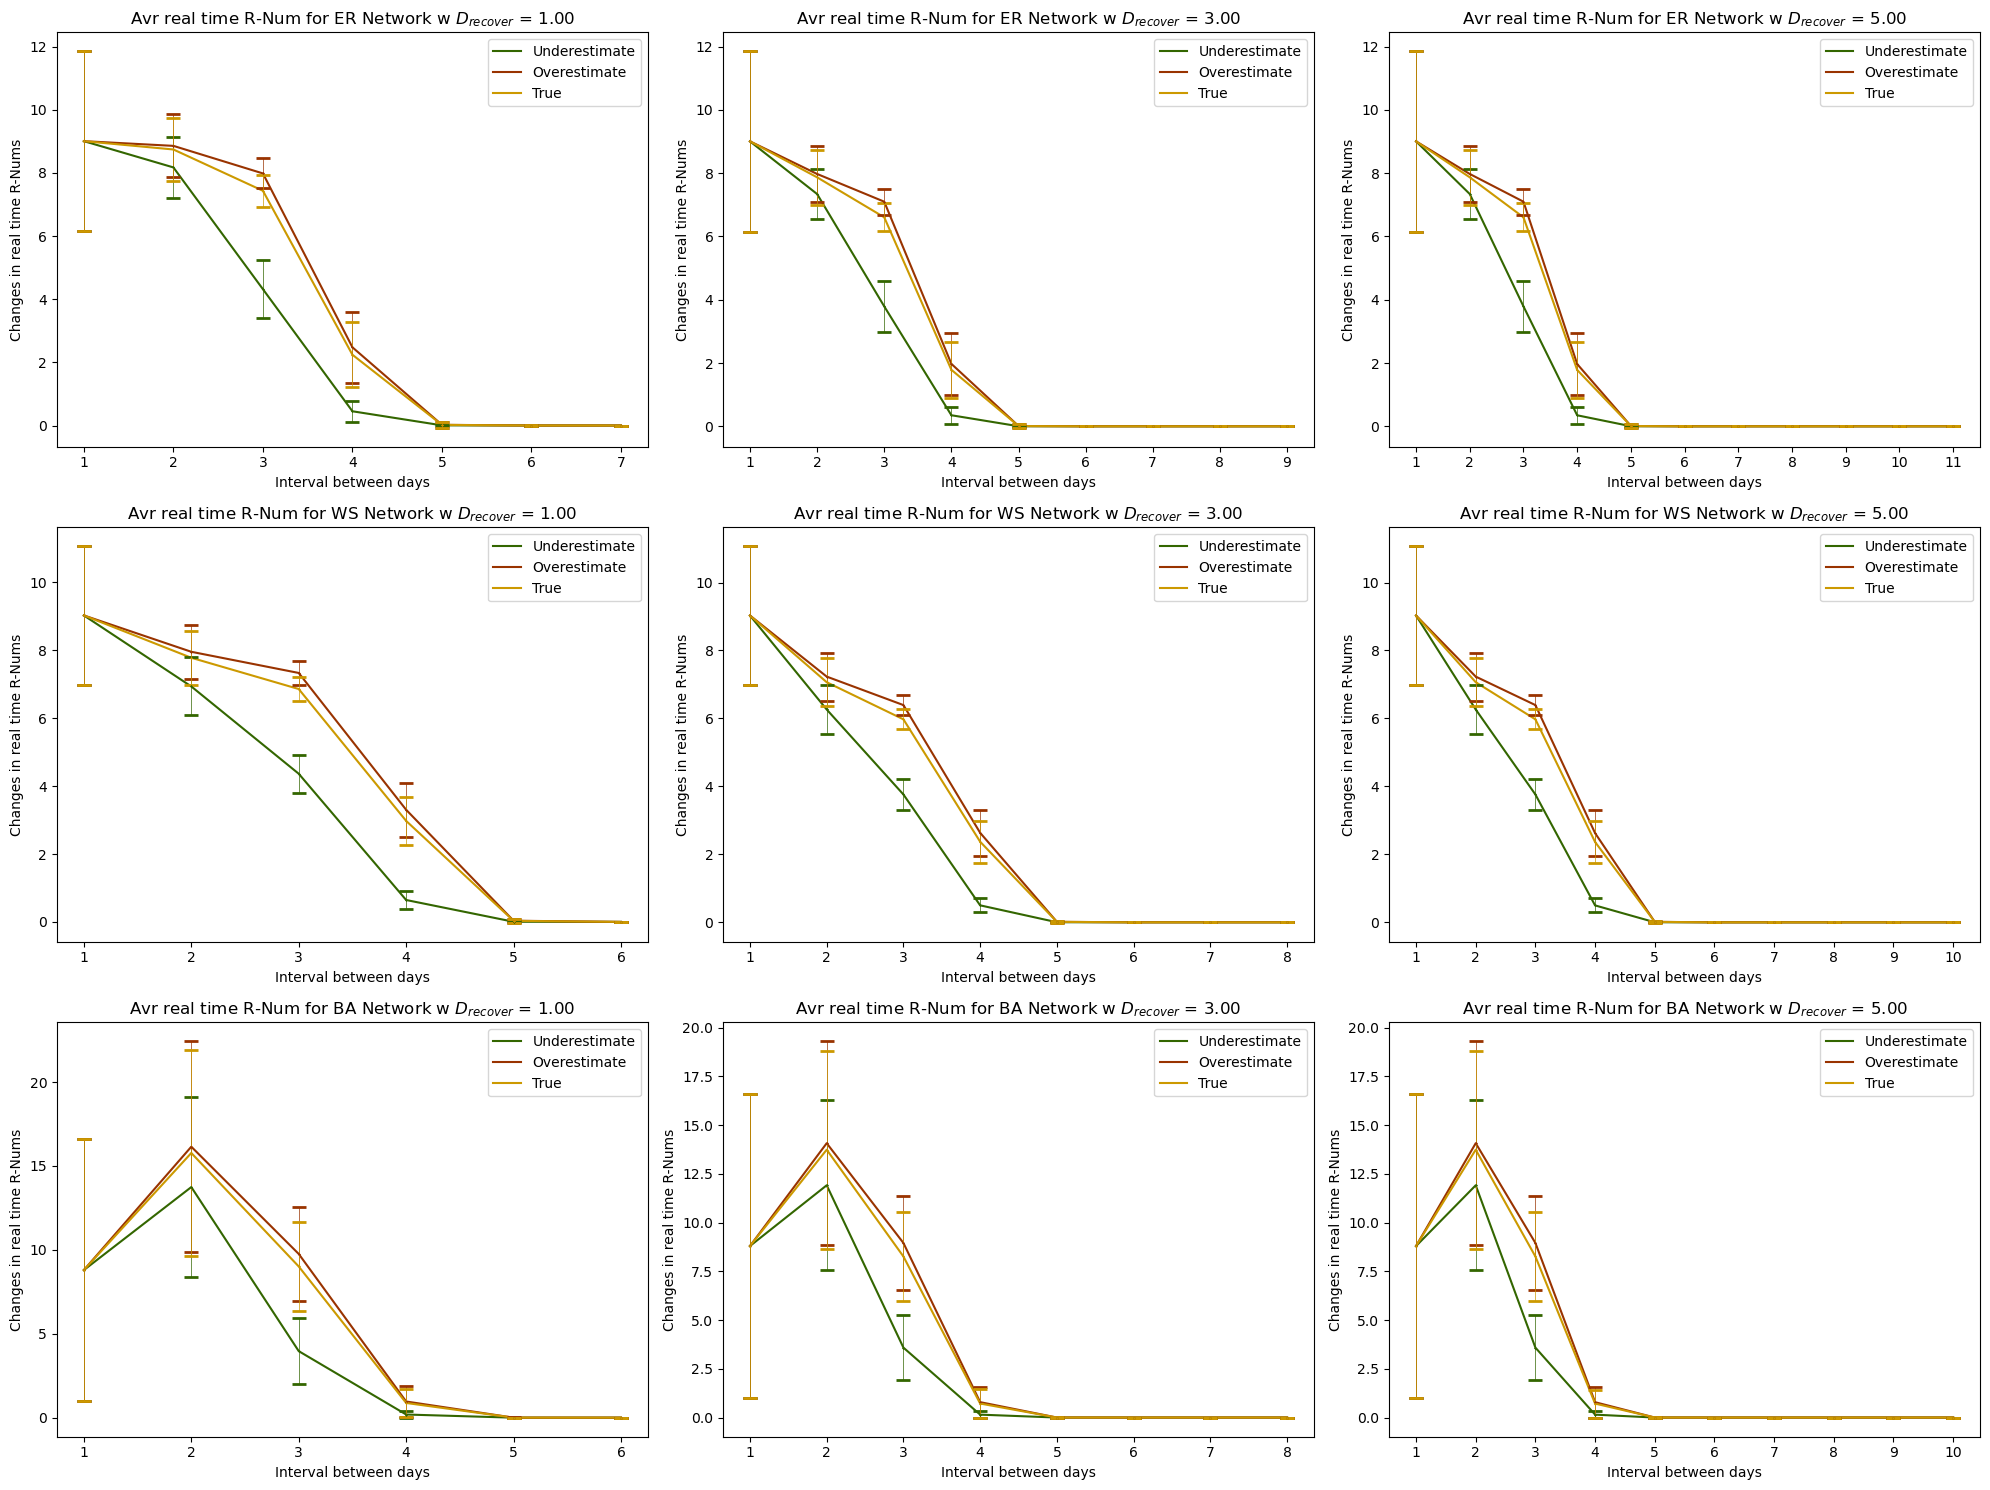

In [37]:
# #Graph of different r_l on Reproduction Numbers
# fig, axs = plt.subplots(3,len(D_recover_array), figsize = (20,15))

# #Used to plot ER
# for i in range(len(ER_average_simulation_result_D)):
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][1], label  = "Underestimate", color = '#336600')
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][2], label  = "Overestimate", color = '#993300')
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][3], label  = "True", color = '#cc9900')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][1] , \
#                        yerr = ER_average_simulation_result_D[i][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#336600')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][2] , \
#                        yerr = ER_average_simulation_result_D[i][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#993300')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][3] , \
#                        yerr = ER_average_simulation_result_D[i][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#cc9900')
#     axs[0][i].set_xticks(np.arange(ER_average_simulation_result_D[i][0][0], ER_average_simulation_result_D[i][0][-1] + 1, 1))
#     ER_title_label= "Avr real time R-Num for ER Network w $D_{recover}$ = " + str("%.2f" % D_recover_array[i])
#     axs[0][i].set_title(ER_title_label)
#     axs[0][i].set_xlabel("Interval between days")
#     axs[0][i].set_ylabel("Changes in real time R-Nums")
#     axs[0][i].legend(loc = 1)
    
# #Used to plot WS
# for j in range(len(WS_average_simulation_result_D)):
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][1], label  = "Underestimate", color = '#336600')
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][2], label  = "Overestimate", color = '#993300')
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][3], label  = "True", color = '#cc9900')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][1] , \
#                        yerr = WS_average_simulation_result_D[j][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#336600')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][2] , \
#                        yerr = WS_average_simulation_result_D[j][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#993300')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][3] , \
#                        yerr = WS_average_simulation_result_D[j][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#cc9900')
#     axs[1][j].set_xticks(np.arange(WS_average_simulation_result_D[j][0][0], WS_average_simulation_result_D[j][0][-1] + 1, 1))
#     WS_title_label= "Avr real time R-Num for WS Network w $D_{recover}$ = " + str("%.2f" % D_recover_array[j])
#     axs[1][j].set_title(WS_title_label)
#     axs[1][j].set_xlabel("Interval between days")
#     axs[1][j].set_ylabel("Changes in real time R-Nums")
#     axs[1][j].legend(loc = 1)    
    
# #Used to plot BA
# for k in range(len(BA_average_simulation_result_D)):
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][1], label  = "Underestimate", color = '#336600')
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][2], label  = "Overestimate", color = '#993300')
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][3], label  = "True", color = '#cc9900')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][1] , \
#                        yerr = BA_average_simulation_result_D[k][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#336600')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][2] , \
#                        yerr = BA_average_simulation_result_D[k][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#993300')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][3] , \
#                        yerr = BA_average_simulation_result_D[k][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#cc9900')
#     axs[2][k].set_xticks(np.arange(BA_average_simulation_result_D[k][0][0], BA_average_simulation_result_D[k][0][-1] + 1, 1))
#     BA_title_label= "Avr real time R-Num for BA Network w $D_{recover}$ = " + str("%.2f" % D_recover_array[k])
#     axs[2][k].set_title(BA_title_label)
#     axs[2][k].set_xlabel("Interval between days")
#     axs[2][k].set_ylabel("Changes in real time R-Nums")
#     axs[2][k].legend(loc = 1)    

# plt.tight_layout()
# plt.show()

In [7]:
np.random.seed(43434)
number_of_simulations = 50
N_simulation_seeds = np.random.choice(1000000, number_of_simulations, replace = False)

#Smallest r_l (set as 0.5 as a default)
I0 = 1
r_l = 9
D_recover_array = np.array([1, 3, 5])

#Run for 5000 simu will be 4h 30mins

In [8]:
# start_time_test = datetime.now()

# ER_average_simulation_result_D = []
# WS_average_simulation_result_D = []
# BA_average_simulation_result_D = []

# for i in D_recover_array:
#     ER_N_runs_D = simulation(I0, i, r_l, ER_network, N_simulation_seeds,0)[0:-1]
#     ER_N_runs_average_D = simulation_average(ER_N_runs_D, number_of_simulations)[1:3]
#     ER_average_simulation_result_D.append(ER_N_runs_average_D[0])
    
# for j in D_recover_array:
#     WS_N_runs_D = simulation(I0, j, r_l, WS_network, N_simulation_seeds,0)[0:-1]
#     WS_N_runs_average_D = simulation_average(WS_N_runs_D, number_of_simulations)[1:3]
#     WS_average_simulation_result_D.append(WS_N_runs_average_D[0])
    
# for k in D_recover_array:
#     BA_N_runs_D = simulation(I0, k, r_l, BA_network, N_simulation_seeds,0)[0:-1]
#     BA_N_runs_average_D = simulation_average(BA_N_runs_D, number_of_simulations)[1:3]
#     BA_average_simulation_result_D.append(BA_N_runs_average_D[0])

# end_time_test = datetime.now()

# print('Duration: {}'.format(end_time_test - start_time_test))

Duration: 4:38:43.115654


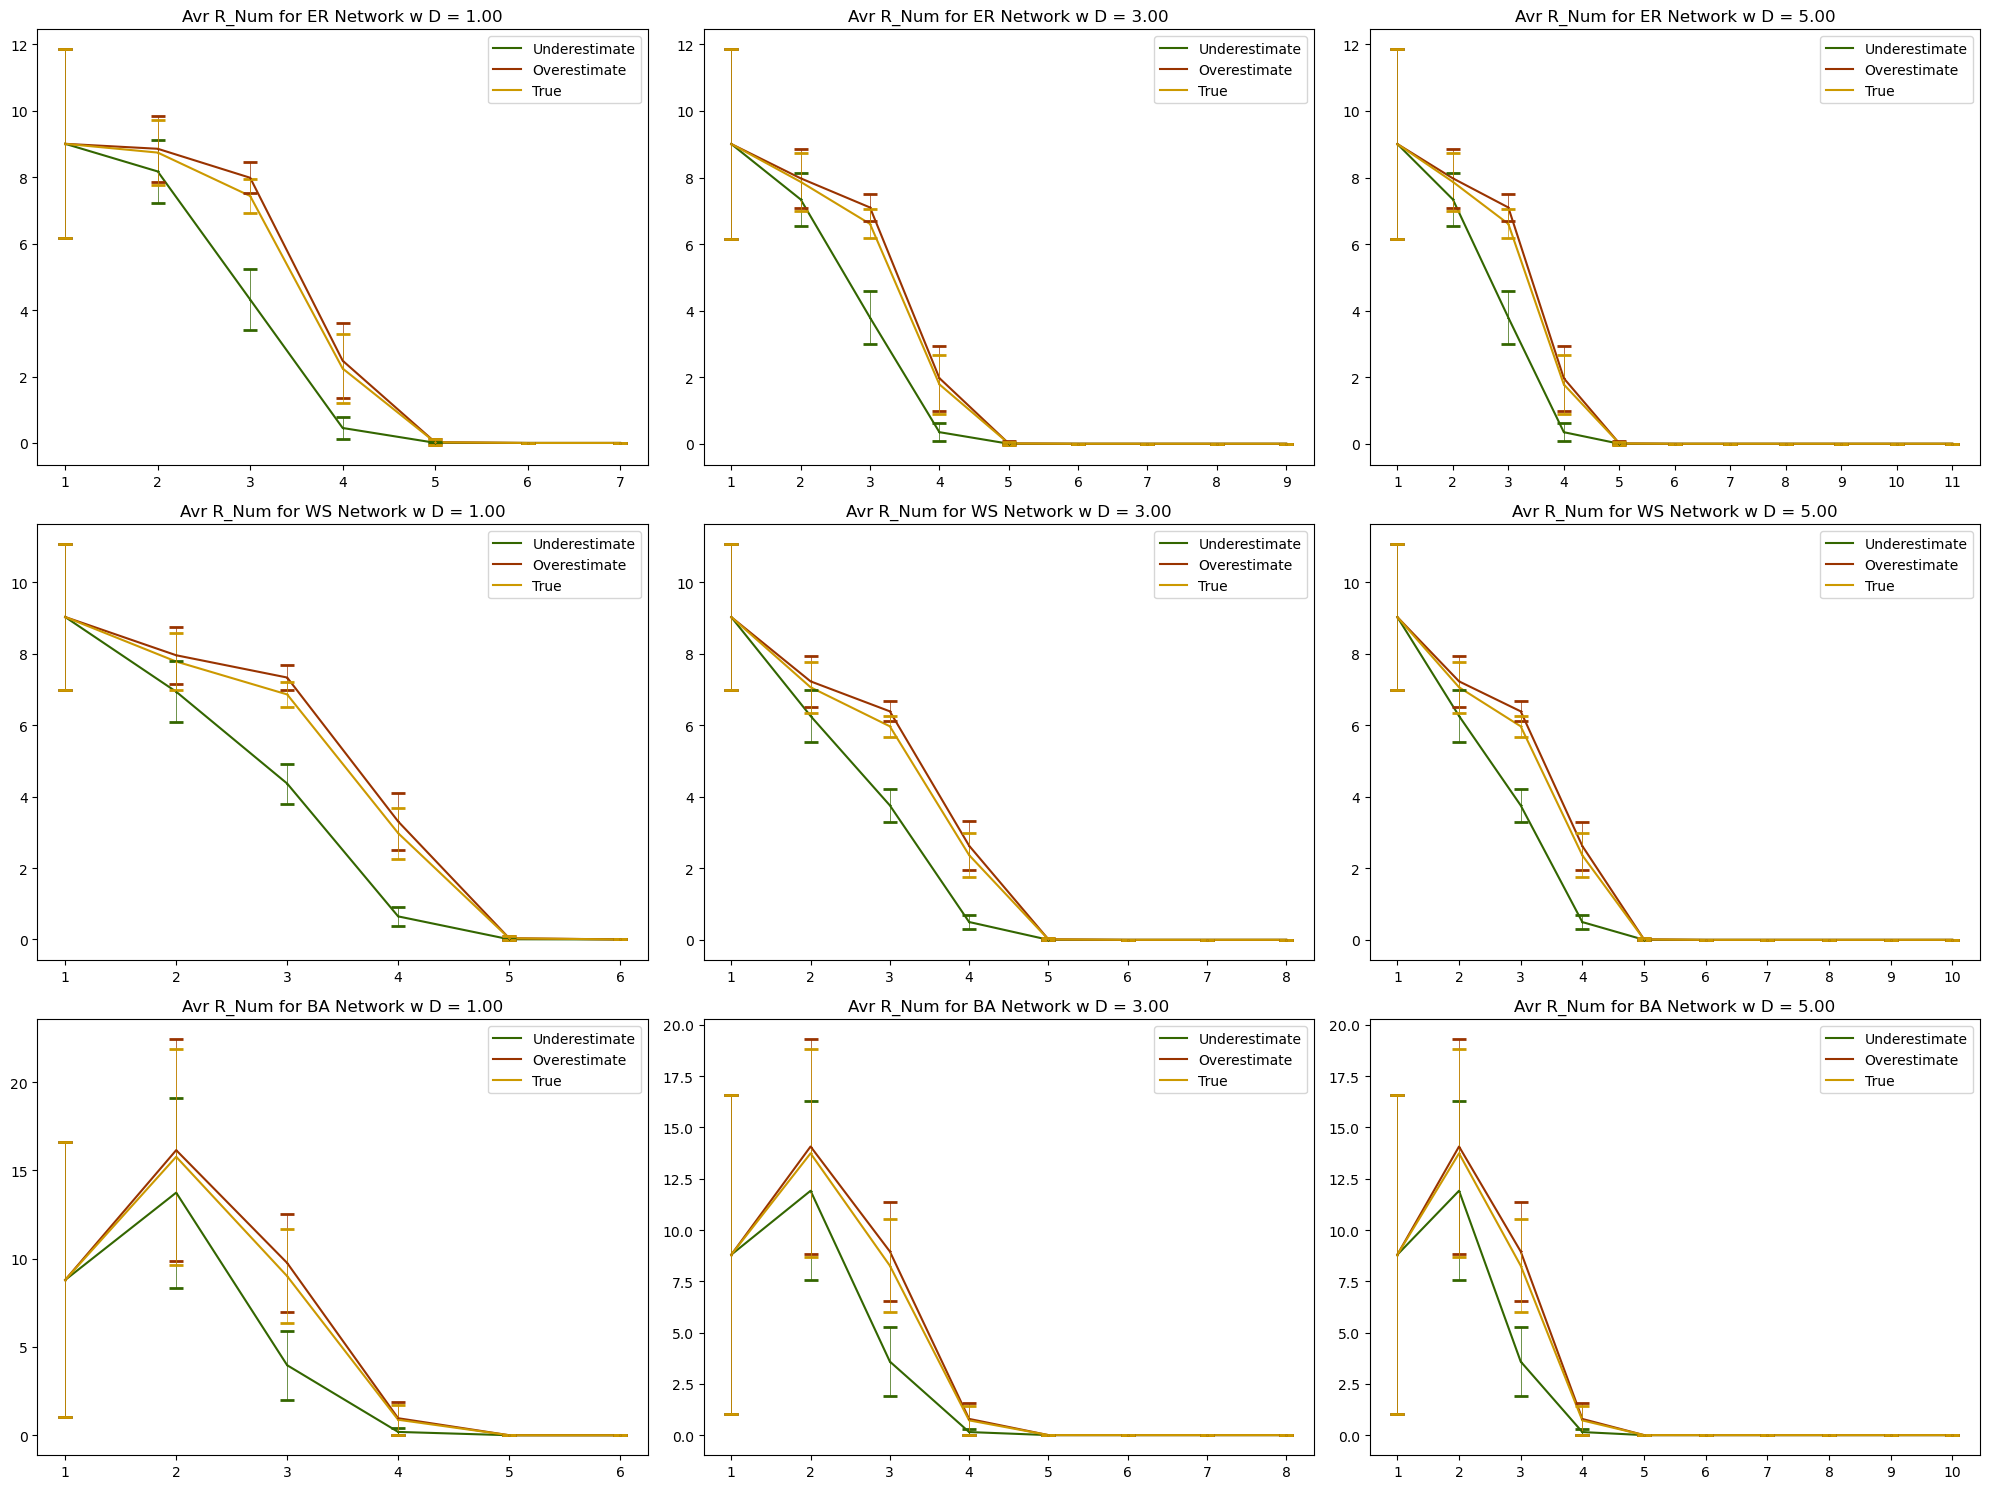

In [10]:
# #Graph of different r_l on Reproduction Numbers
# fig, axs = plt.subplots(3,len(D_recover_array), figsize = (20,15))

# #Used to plot ER
# for i in range(len(ER_average_simulation_result_D)):
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][1], label  = "Underestimate", color = '#336600')
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][2], label  = "Overestimate", color = '#993300')
#     axs[0][i].plot(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][3], label  = "True", color = '#cc9900')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][1] , \
#                        yerr = ER_average_simulation_result_D[i][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#336600')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][2] , \
#                        yerr = ER_average_simulation_result_D[i][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#993300')
#     axs[0][i].errorbar(ER_average_simulation_result_D[i][0], ER_average_simulation_result_D[i][3] , \
#                        yerr = ER_average_simulation_result_D[i][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#cc9900')
#     axs[0][i].set_xticks(np.arange(ER_average_simulation_result_D[i][0][0], ER_average_simulation_result_D[i][0][-1] + 1, 1))
#     ER_title_label= "Avr R_Num for ER Network w D = " + str("%.2f" % D_recover_array[i])
#     axs[0][i].set_title(ER_title_label)
#     axs[0][i].legend(loc = 1)
    
# #Used to plot WS
# for j in range(len(WS_average_simulation_result_D)):
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][1], label  = "Underestimate", color = '#336600')
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][2], label  = "Overestimate", color = '#993300')
#     axs[1][j].plot(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][3], label  = "True", color = '#cc9900')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][1] , \
#                        yerr = WS_average_simulation_result_D[j][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#336600')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][2] , \
#                        yerr = WS_average_simulation_result_D[j][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#993300')
#     axs[1][j].errorbar(WS_average_simulation_result_D[j][0], WS_average_simulation_result_D[j][3] , \
#                        yerr = WS_average_simulation_result_D[j][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#cc9900')
#     axs[1][j].set_xticks(np.arange(WS_average_simulation_result_D[j][0][0], WS_average_simulation_result_D[j][0][-1] + 1, 1))
#     WS_title_label= "Avr R_Num for WS Network w D = " + str("%.2f" % D_recover_array[j])
#     axs[1][j].set_title(WS_title_label)
#     axs[1][j].legend(loc = 1)    
    
# #Used to plot BA
# for k in range(len(BA_average_simulation_result_D)):
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][1], label  = "Underestimate", color = '#336600')
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][2], label  = "Overestimate", color = '#993300')
#     axs[2][k].plot(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][3], label  = "True", color = '#cc9900')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][1] , \
#                        yerr = BA_average_simulation_result_D[k][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5,capthick = 2, color = '#336600')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][2] , \
#                        yerr = BA_average_simulation_result_D[k][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#993300')
#     axs[2][k].errorbar(BA_average_simulation_result_D[k][0], BA_average_simulation_result_D[k][3] , \
#                        yerr = BA_average_simulation_result_D[k][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                        capsize = 5, capthick = 2,color = '#cc9900')
#     axs[2][k].set_xticks(np.arange(BA_average_simulation_result_D[k][0][0], BA_average_simulation_result_D[k][0][-1] + 1, 1))
#     BA_title_label= "Avr R_Num for BA Network w D = " + str("%.2f" % D_recover_array[k])
#     axs[2][k].set_title(BA_title_label)
#     axs[2][k].legend(loc = 1)    

# plt.tight_layout()
# plt.show()

#### <u> 5.2.1 Results & Discussion </u>

From the plots, we notice some interesting results for both $r_l$ = 3 & 9. Firstly, we note that a smaller $r_l$ will cause $r_T$ to tend towards $r_U$ while a larger one will tend towards $r_O$, regardless of the recovery times across all networks. This suggests that $r_T$ is strongly related to the probability of transmission, characterized by $r_l$, rather than $D_{recover}$ <br>

Next, we find that for both $r_l$ = 3 & 9, the first instance where all reproduction numbers = 0 (with SD = 0), occurs at $t_k$ = $t_{end} - D_{recover}$, where $t_{end}$ is the end time of the epidemic for its corresponding network. This commensurates with our expectations since the last infected individual(s) should require $D_{recover}$ number of days to recover, and therefore, there should not be any new infection by $t_k$. <br>

Lastly, we encounter an interesting scenario for $r_l$ = 3, where we find that $t_k$ is the largest for $D_{recover} = 1$ across all networks. This is counter-intuitive since a shorter $D_{recover}$ should imply faster recovery and a smaller infectious period, thereby causing the epidemic to end earlier. In this case, it could have been that the virus has taken a longer path to reach a susceptible neighbour since an infected individual only takes a day to recover. Conversely, if $D_{recover}$ is larger than one, the virus may have the "option" to traverse a shorter route to a susceptible neighbour on other days, causing the spread to a suscepible individual to be quicker than expected. <br>

However, we do not meet such an anomaly for the case of $r_l$ = 9, as seen where $t_k$ is a constant as we increment $D_{recover}$ across all networks. This strongly suggests that a higher virus transmissibility due to $r_l$ has the ability to outweigh the effect cause by the period of infectiousness, $D_recover$.

#### <u> 6. Conclusion </u>
We have seen how an epidemic behaves when we use a more realistic stoachastic approach to model interactions, notably social complex networks. In the results we found that the BA network gives $r_T$ that is "explosive" in nature at the initial stages while ER and WS networks has $r_T$ that declines gradually over time. We also discovered that $r_l$, which characterizes transmission probabilities between susceptible and infected individuals, is crucial in helping us understand whether we have under or overestimated the actual reproducibility of a virus in a community. Lastly, we concluded that the magnitude of $r_l$ of an epidemic affects the dynamics of an epidemic more than its infectious period $D_{recover}$ even when social networks share almost the same average degree of connections.<br>

Though our agent based model has considered interactions on a more realistic scale, transmission of the virus is only limited to pairwise interactions (edges) between individuals. In reality, people congregate in groups rather than pairs and these higher ordered interactions should be considered when we model epidemic spreading. Therefore, we shall build on our social complex network by introducing joint interactions in the form of simplicial complexes.


### --------------------------------------------------------------THE END------------------------------------------------------------------------

#MUST DO GAMMA#
<b> *CITE: An Epidemic Model with Time-Distributed Recovery and Death Rates - Samiran Ghosh, Vitaly Volpert & Malay Banerjee, Singapore Ministry of Health. https://www.moh.gov.sg/covid-19 - gamma distribution shown by N. N. Chung1* & L.Y. Chew2,3,4 </b>

#### <u> 5.2.2 Gaussian $D_{recover}$ </u>
In reality, individuals will have different recovery time when they contract a virus. According to real world data, the recovery time of viruses follow a gaussian distribution revolving about some mean, $\mu_{recover}$. In this section, we shall see the effect of varying recovery times following a gaussian distribution, with mean, $\mu_{recover}$ = 3

In [7]:
np.random.seed(43434)
number_of_simulations = 5000
N_simulation_seeds = np.random.choice(1000000, number_of_simulations, replace = False)

I0 = 1
r_l = 4
D_recover_mean = 3

#Results from N number of simulations
ER_N_runs_simulation_result_gamma = simulation(I0, D_recover_mean, r_l, ER_network, N_simulation_seeds,1)[0:-1]
WS_N_runs_simulation_result_gamma = simulation(I0, D_recover_mean, r_l, WS_network, N_simulation_seeds,1)[0:-1]
BA_N_runs_simulation_result_gamma = simulation(I0, D_recover_mean, r_l, BA_network, N_simulation_seeds,1)[0:-1]

#Average results and their SD
ER_average_simulation_result_gamma = simulation_average(ER_N_runs_simulation_result_gamma, number_of_simulations)
WS_average_simulation_result_gamma = simulation_average(WS_N_runs_simulation_result_gamma, number_of_simulations)
BA_average_simulation_result_gamma = simulation_average(BA_N_runs_simulation_result_gamma, number_of_simulations)

#Closeness of ensemble r_l with input r_l
ER_ensemble_local_gamma = 1 - ((abs(r_l - ER_average_simulation_result_gamma[-1])) / r_l)
WS_ensemble_local_gamma = 1 - ((abs(r_l - WS_average_simulation_result_gamma[-1])) / r_l)
BA_ensemble_local_gamma = 1 - ((abs(r_l - BA_average_simulation_result_gamma[-1])) / r_l)

print("Closeness of ER ensemble r_l is:", ER_ensemble_local)
print("Closeness of WS ensemble r_l is:", WS_ensemble_local)
print("Closeness of BA ensemble r_l is:", BA_ensemble_local)

KeyboardInterrupt: 

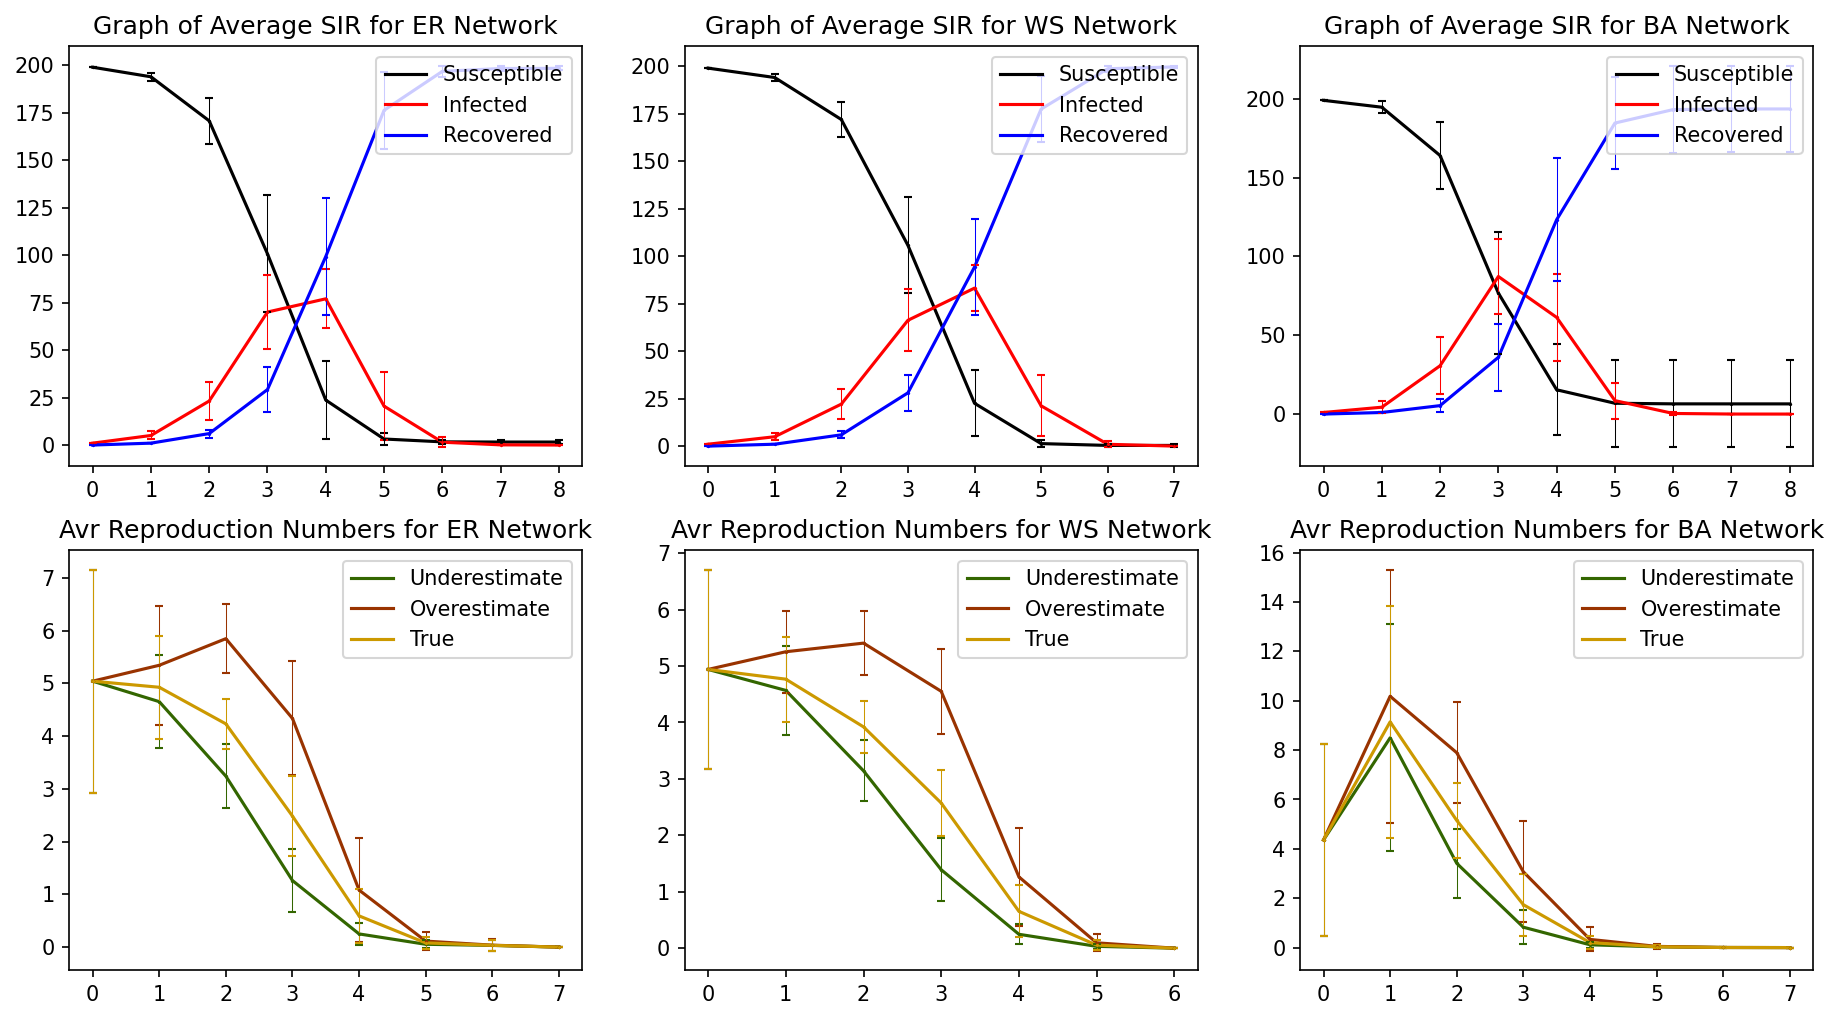

In [33]:
fig, axs = plt.subplots(2,3, figsize = (15,8))

#PLOT SIR FOR NETWORKS
#ER
axs[0][0].plot(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][1], label  = "Susceptible", color = 'k')
axs[0][0].plot(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][2], label  = "Infected", color = 'r')
axs[0][0].plot(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][3], label  = "Recovered", color = 'b')
axs[0][0].errorbar(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][1] , \
                   yerr = ER_average_simulation_result_gamma[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][0].errorbar(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][2] , \
                   yerr = ER_average_simulation_result_gamma[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][0].errorbar(ER_average_simulation_result_gamma[0][0], ER_average_simulation_result_gamma[0][3] , \
                   yerr = ER_average_simulation_result_gamma[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][0].set_xticks(np.arange(ER_average_simulation_result_gamma[0][0][0], ER_average_simulation_result_gamma[0][0][-1] + 1))
axs[0][0].set_title("Graph of Average SIR for ER Network")
axs[0][0].legend(loc = 1)

#WS
axs[0][1].plot(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][1], label  = "Susceptible", color = 'k')
axs[0][1].plot(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][2], label  = "Infected", color = 'r')
axs[0][1].plot(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][3], label  = "Recovered", color = 'b')
axs[0][1].errorbar(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][1] , \
                   yerr = WS_average_simulation_result_gamma[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][1].errorbar(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][2] , \
                   yerr = WS_average_simulation_result_gamma[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][1].errorbar(WS_average_simulation_result_gamma[0][0], WS_average_simulation_result_gamma[0][3] , \
                   yerr = WS_average_simulation_result_gamma[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][1].set_xticks(np.arange(WS_average_simulation_result_gamma[0][0][0], WS_average_simulation_result_gamma[0][0][-1] + 1))
axs[0][1].set_title("Graph of Average SIR for WS Network")
axs[0][1].legend(loc = 1)

#BA
axs[0][2].plot(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][1], label  = "Susceptible", color = 'k')
axs[0][2].plot(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][2], label  = "Infected", color = 'r')
axs[0][2].plot(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][3], label  = "Recovered", color = 'b')
axs[0][2].errorbar(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][1] , \
                   yerr = BA_average_simulation_result_gamma[0][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'k')
axs[0][2].errorbar(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][2] , \
                   yerr = BA_average_simulation_result_gamma[0][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'r')
axs[0][2].errorbar(BA_average_simulation_result_gamma[0][0], BA_average_simulation_result_gamma[0][3] , \
                   yerr = BA_average_simulation_result_gamma[0][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = 'b')
axs[0][2].set_xticks(np.arange(BA_average_simulation_result_gamma[0][0][0], BA_average_simulation_result_gamma[0][0][-1] + 1))
axs[0][2].set_title("Graph of Average SIR for BA Network")
axs[0][2].legend(loc = 1)

#####################################################################################################

#PLOT REPRODUCTION NUMBERS FOR NETWORKS
#ER
axs[1][0].plot(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][1], label  = "Underestimate", color = '#336600')
axs[1][0].plot(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][2], label  = "Overestimate", color = '#993300')
axs[1][0].plot(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][3], label  = "True", color = '#cc9900')
axs[1][0].errorbar(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][1] , \
                   yerr = ER_average_simulation_result_gamma[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][0].errorbar(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][2] , \
                   yerr = ER_average_simulation_result_gamma[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][0].errorbar(ER_average_simulation_result_gamma[1][0], ER_average_simulation_result_gamma[1][3] , \
                   yerr = ER_average_simulation_result_gamma[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][0].set_xticks(np.arange(ER_average_simulation_result_gamma[1][0][0], ER_average_simulation_result_gamma[1][0][-1] + 1))
axs[1][0].set_title("Avr Reproduction Numbers for ER Network")
axs[1][0].legend(loc = 1)

#WS
axs[1][1].plot(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][1], label  = "Underestimate", color = '#336600')
axs[1][1].plot(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][2], label  = "Overestimate", color = '#993300')
axs[1][1].plot(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][3], label  = "True", color = '#cc9900')
axs[1][1].errorbar(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][1] , \
                   yerr = WS_average_simulation_result_gamma[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][1].errorbar(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][2] , \
                   yerr = WS_average_simulation_result_gamma[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][1].errorbar(WS_average_simulation_result_gamma[1][0], WS_average_simulation_result_gamma[1][3] , \
                   yerr = WS_average_simulation_result_gamma[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][1].set_xticks(np.arange(WS_average_simulation_result_gamma[1][0][0], WS_average_simulation_result_gamma[1][0][-1] + 1))
axs[1][1].set_title("Avr Reproduction Numbers for WS Network")
axs[1][1].legend(loc = 1)

#BA
axs[1][2].plot(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][1], label  = "Underestimate", color = '#336600')
axs[1][2].plot(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][2], label  = "Overestimate", color = '#993300')
axs[1][2].plot(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][3], label  = "True", color = '#cc9900')
axs[1][2].errorbar(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][1] , \
                   yerr = BA_average_simulation_result_gamma[1][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#336600')
axs[1][2].errorbar(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][2] , \
                   yerr = BA_average_simulation_result_gamma[1][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#993300')
axs[1][2].errorbar(BA_average_simulation_result_gamma[1][0], BA_average_simulation_result_gamma[1][3] , \
                   yerr = BA_average_simulation_result_gamma[1][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
                   capsize = 2, color = '#cc9900')

axs[1][2].set_xticks(np.arange(BA_average_simulation_result_gamma[1][0][0], BA_average_simulation_result_gamma[1][0][-1] + 1))
axs[1][2].set_title("Avr Reproduction Numbers for BA Network")
axs[1][2].legend(loc = 1)

plt.show()

### ------------------------------------------------------------END------------------------------------------------------------

In [ ]:
#Save figs + data!
# # ER_average_simulation_result_D = []
# # WS_average_simulation_result_D = []
# # BA_average_simulation_result_D = []
# i = 2
# # np.savetxt('Avr real time R-Num for BA Network r_l9 D_rec5 (5000).csv', BA_average_simulation_result_D[b] , delimiter=',')
# plt.plot(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][1], label  = "Underestimate", color = '#336600')
# plt.plot(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][2], label  = "Overestimate", color = '#993300')
# plt.plot(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][3], label  = "True", color = '#cc9900')
# plt.errorbar(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][1] , \
#                    yerr = BA_average_simulation_result_D[i][4], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                    capsize = 5,capthick = 2, color = '#336600')
# plt.errorbar(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][2] , \
#                    yerr = BA_average_simulation_result_D[i][5], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                    capsize = 5,capthick = 2, color = '#993300')
# plt.errorbar(BA_average_simulation_result_D[i][0], BA_average_simulation_result_D[i][3] , \
#                    yerr = BA_average_simulation_result_D[i][6], fmt = 'x', markersize = 1, elinewidth = 0.5, \
#                    capsize = 5,capthick = 2, color = '#cc9900')
# plt.xticks(np.arange(BA_average_simulation_result_D[i][0][0], BA_average_simulation_result_D[i][0][-1] + 1, 1))
# BA_title_label= "Avr R_Num for BA Network w D = " + str("%.2f" % D_recover_array[i])
# plt.title(BA_title_label)
# plt.legend(loc = 1)
# plt.xlabel("Interval between days")
# plt.ylabel("Changes in real time R-Nums")

# plt.savefig("Avr real time R-Num for BA Network r_l9 D_rec5 (5000).png", dpi = 300) 

# plt.show()